## Video Games Sales Project

### Background:
With the COVID-19 pandemic the number of people staying at home has increased. Virious sources report that the time people spent playing video games has increased as well. This trend is expected to continue. A small video games developer startup wants to capitalize on the current condition and wants to create a top-selling game. They do not have data scientist on staff and has contracted us to help them identify what game(s) they should focus on developing. 

### Problem Statement:
The company has a great develpers team capable of developing games for any gaming platform and any genre. However, their resources are limited and can develop only one game within a period of 1-2 years. Thus the goal is to determine what game based on **genre**, **platform**, **ESRB rating** and **publisher** has high probability to be a best seller.

### Our Task:
Analyze the available data and create a model to predict which features as listed above are most likely to make a top selling game. We need to present our results and make a recommendation to the company top management team within 4 weeks.

### Currently Available Data:
We have data for sales of large number of video games (55,792 records) as of April 12th, 2019. Source of data: Kaggle, https://www.kaggle.com/ashaheedq/video-games-sales-2019, “vgsales-12-4-2019.csv” with the following fields:
- Rank - Ranking of overall sales
- Name - Name of the game
- Platform - Platform of the game (i.e. PC, PS4, XOne, etc.)
- Genre - Genre of the game
- ESRB Rating - ESRB Rating of the game
- Publisher - Publisher of the game
- Developer - Developer of the game
- Critic Score - Critic score of the game from 10
- User Score - Users score the game from 10
- Total Shipped - Total shipped copies of the game
- Global_Sales - Total worldwide sales (in millions)
- NA_Sales - Sales in North America (in millions)
- PAL_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Year - Year of release of the game.

### Important Data Information
- Data is for **paid** games only and only **hard copies** (e.g. DVD) sold
- Some inaccuracies in data have been found. Therefore, results here should not be used for real-world business decisions. **The project focuses on demonstrating the steps of data processing, vizualization, and applying powerfull statistical analysis and predictive modeling with data of this kind.** 

### Outline of Work

#### I. Data Processing and EDA
**1) Applying a filter of minimum number of games in a year**: 
- Set a threshold for number of games in a year - here we use a threshold of 100 -  and select only years which pass the threshold

**2) Selecting relevant games features**
- **Part 1**: 
    - Decide on important and pertinent game features and select only those features

- **Part 2**: 
    - Find the unique values of each of the selected features and apply additional filter by choosing a count threshold for these values

**3) Normalization of game sales**: 
- Divide the money each game has made by the average amount of money per game for that year -- we are not using total sales for a particular year because of possibility of the different number of games in different years

**4) Feature engineering and EDA**: 
- Create new features to be able to categorize how successful games are for different Genre, ESRB Rating, Genre, and Publisher
- Explore different features relationships and distributions


#### II. Modeling and Predictions
 
- Create a classification model which will determine which category a game belongs to based on its features
- Predict future games sales
- Analysis of prediction results and recommendations

In [1]:
# Import relevant libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.8)

In [2]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

### Load data

In [3]:
# Read data
data = pd.read_csv('vgsales-12-4-2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [4]:
# Data preview

data.head(10)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


- Eliminate nulls in 'Year' and 'Global_Sales' - these are two critical features in our analysis and there is no meaningful way to fill the missing data.

In [5]:
mask = data['Global_Sales'].isnull() | data['Year'].isnull()
data = data[~mask]
data.reset_index(inplace = True, drop = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19377 entries, 0 to 19376
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            19377 non-null  int64  
 1   Name            19377 non-null  object 
 2   basename        19377 non-null  object 
 3   Genre           19377 non-null  object 
 4   ESRB_Rating     13792 non-null  object 
 5   Platform        19377 non-null  object 
 6   Publisher       19377 non-null  object 
 7   Developer       19374 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    4273 non-null   float64
 10  User_Score      172 non-null    float64
 11  Total_Shipped   0 non-null      float64
 12  Global_Sales    19377 non-null  float64
 13  NA_Sales        12958 non-null  float64
 14  PAL_Sales       13165 non-null  float64
 15  JP_Sales        7035 non-null   float64
 16  Other_Sales     15496 non-null  float64
 17  Year            19377 non-null 

## I. Data Processing and EDA

### 1. Filter by a minimum number of games released in a year

In [6]:
# Convert data['Year'] to int data type
data['Year'] = data['Year'].astype('int')

# check
data['Year'].dtype

dtype('int32')

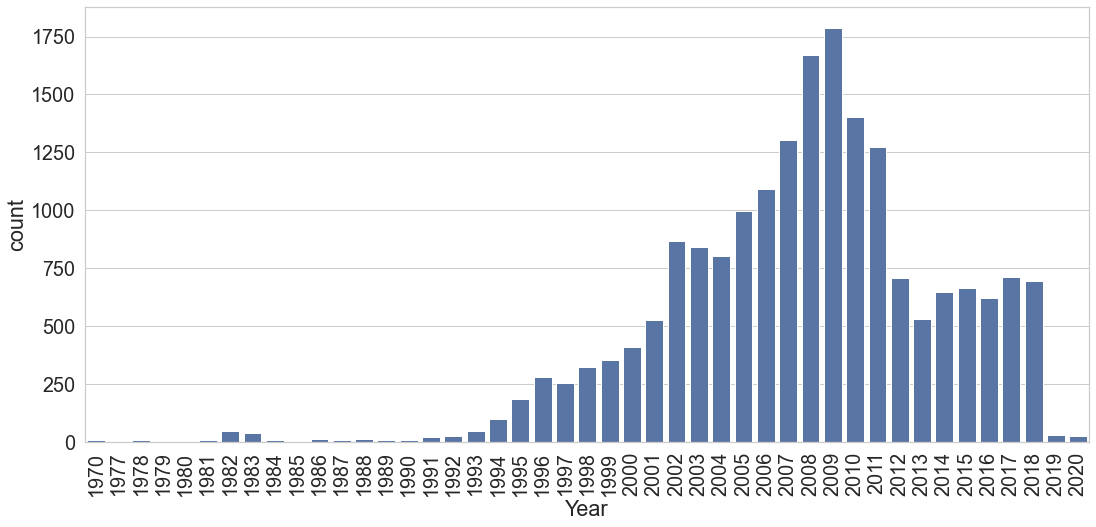

In [7]:
# Countplot of data['Year']

plt.figure(figsize = (18, 8))
sns.countplot(data['Year'], color = 'b')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

**Observations**: 
- Clearly, there is limited data for the years up to 1994/1995 and for 2019 and 2020
- The drop in number of games released after 2011 is due to: a) increased sales of **soft copies** via e-stores (Valve's Steam, EA Store); b) increasing numer of **free-to-play** games which make profit from in-game merchandise sales

In [8]:
# Get a numerical count for each year in order to decide on a count threshold

print(data['Year'].value_counts())

2009    1788
2008    1672
2010    1403
2007    1302
2011    1273
2006    1090
2005     999
2002     868
2003     843
2004     803
2017     713
2012     706
2018     693
2015     663
2014     648
2016     623
2013     531
2001     525
2000     410
1999     355
1998     324
1996     280
1997     253
1995     184
1994      99
1993      47
1982      46
1983      37
2019      31
2020      27
1992      25
1991      21
1986      12
1988      11
1970      10
1984      10
1978       9
1989       8
1990       7
1987       7
1981       7
1980       6
1985       4
1977       3
1979       1
Name: Year, dtype: int64


We will set a threshold of minimum 200 titles released in a year and will eliminate all years below that threshold.

In [9]:
# Create filter
freq_year = data['Year'].value_counts()
freq_values_year = freq_year[freq_year >= 200].index

print(freq_values_year)

Int64Index([2009, 2008, 2010, 2007, 2011, 2006, 2005, 2002, 2003, 2004, 2017,
            2012, 2018, 2015, 2014, 2016, 2013, 2001, 2000, 1999, 1998, 1996,
            1997],
           dtype='int64')


In [10]:
# Create a new data set by applying filter

data_1 = data[data['Year'].isin(freq_values_year)]

data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18765 entries, 0 to 19376
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            18765 non-null  int64  
 1   Name            18765 non-null  object 
 2   basename        18765 non-null  object 
 3   Genre           18765 non-null  object 
 4   ESRB_Rating     13658 non-null  object 
 5   Platform        18765 non-null  object 
 6   Publisher       18765 non-null  object 
 7   Developer       18762 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    4250 non-null   float64
 10  User_Score      172 non-null    float64
 11  Total_Shipped   0 non-null      float64
 12  Global_Sales    18765 non-null  float64
 13  NA_Sales        12716 non-null  float64
 14  PAL_Sales       12904 non-null  float64
 15  JP_Sales        6641 non-null   float64
 16  Other_Sales     15096 non-null  float64
 17  Year            18765 non-null 

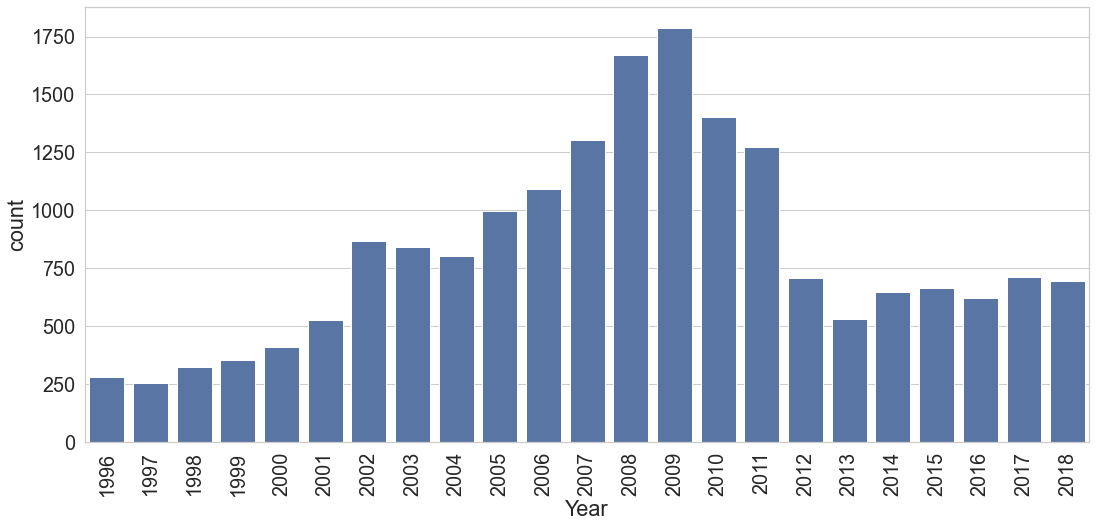

In [11]:
# Check using countplot of data_1['Year']

plt.figure(figsize = (18, 8))
sns.countplot(data_1['Year'], color = 'b')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

The filter with minimum of 200 games released in a year has been applied successfuly

**Note**: There are no gaps in the years of the data selected!

### 2. Select relevant features - Part 1

In [12]:
# Check features
data_1.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

In [13]:
# Select the most relevant features

features = ['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Global_Sales', 
              'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year']
data_1 = data_1[features]
data_1.columns

Index(['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Global_Sales',
       'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year'],
      dtype='object')

In [14]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18765 entries, 0 to 19376
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18765 non-null  object 
 1   Genre         18765 non-null  object 
 2   ESRB_Rating   13658 non-null  object 
 3   Platform      18765 non-null  object 
 4   Publisher     18765 non-null  object 
 5   Global_Sales  18765 non-null  float64
 6   NA_Sales      12716 non-null  float64
 7   PAL_Sales     12904 non-null  float64
 8   JP_Sales      6641 non-null   float64
 9   Other_Sales   15096 non-null  float64
 10  Year          18765 non-null  int32  
dtypes: float64(5), int32(1), object(5)
memory usage: 2.3+ MB


In [15]:
data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,20.32,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,19.39,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,16.15,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,15.86,9.06,5.33,0.06,1.42,2013
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,15.09,6.18,6.05,0.41,2.44,2015
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,14.82,9.07,4.29,0.13,1.33,2011
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,14.74,9.76,3.73,0.11,1.14,2010
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,13.94,5.26,6.21,0.21,2.26,2018
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,13.86,8.27,4.32,0.07,1.20,2012
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,13.80,4.99,5.88,0.65,2.28,2012


**Observations**:
- 'Name': 
    - The same games name appears multiple times because of the title being released on several platforms - PC, PlayStation, XBox, etc. Since we are interested in the success of a game for each platform we will treat these entries as separate games.
- Essential independent features:
    - Genre
    - ESRB Rating
    - Platform
    - Publisher
    - Year
- Dependent feature(s):
    - Global Sales - this is the feature we will use later to create a target label
    - All other sales - in this project we are not interested in sales by markets, so these features will not be relevant for our analysis and modeling and will be removed later
    
    
First, we will examine all of the essential independent features.

- **Examine 'Genre'**

In [16]:
# Get count of each genre as percentage of total number of data points

print(round(data_1['Genre'].value_counts(normalize = True), 3) * 100)

Action              15.0
Sports              13.5
Misc                11.8
Adventure           10.0
Role-Playing         8.1
Shooter              7.7
Racing               7.5
Simulation           5.9
Platform             4.9
Fighting             4.5
Strategy             4.4
Puzzle               3.6
Action-Adventure     1.4
Music                0.8
Visual Novel         0.6
MMO                  0.2
Party                0.1
Board Game           0.0
Education            0.0
Sandbox              0.0
Name: Genre, dtype: float64


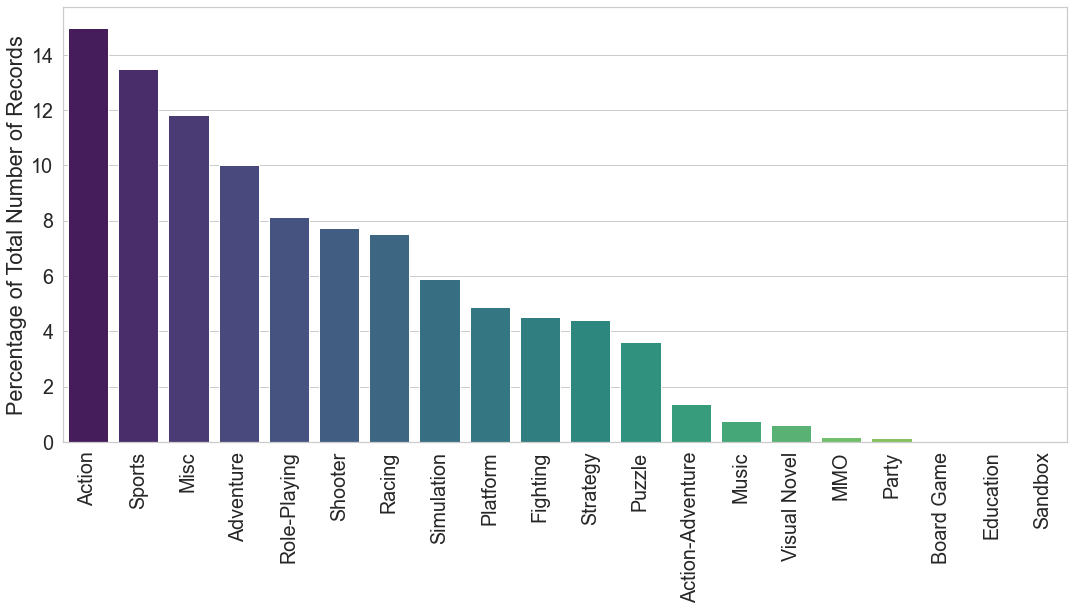

In [17]:
# Visualize in a plot
data_genre_count = data_1['Genre'].value_counts(normalize = True) * 100

plt.figure(figsize = (18, 8))
sns.barplot(x = data_genre_count.index, y = data_genre_count.values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

Based on these results we choose to select only **genres** which account for at least 1% of the total number of records - all **genres** up to **Action-Adventure** included.

- **Examine 'ESRB_Rating'**

In [18]:
# Get count of each rating as percentage of total number of data points

print(round(data_1['ESRB_Rating'].value_counts(normalize = True), 3) * 100)

E      42.5
T      28.7
M      14.9
E10    13.4
RP      0.2
EC      0.2
Name: ESRB_Rating, dtype: float64


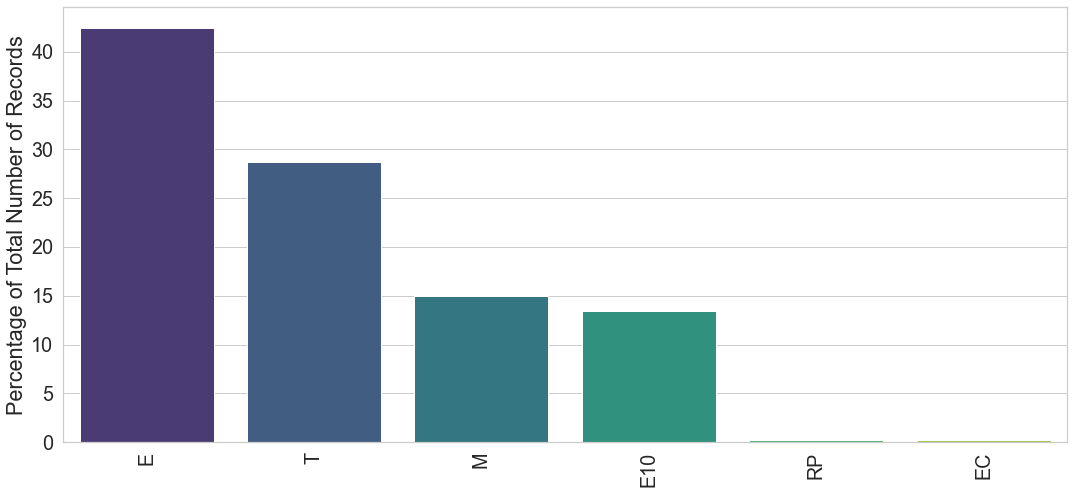

In [19]:
# Visualize in a plot
data_rating_count = data_1['ESRB_Rating'].value_counts(normalize = True) * 100

plt.figure(figsize = (18, 8))
sns.barplot(x = data_rating_count.index, y = data_rating_count.values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

Based on these results we choose to select only **ratings** which account for at least 1% of the total number of records - includes 'E' (Everyone), 'T' (Teen), 'M' (Mature) and E10 (Everyone 10 and above).

- **Examine 'Platform'**

In [20]:
# Get count of each platform as percentage of total number of data points

print(round(data_1['Platform'].value_counts(normalize = True), 3) * 100)

DS      12.9
PS2     11.7
PC       8.6
PS3      7.3
Wii      7.3
PSP      7.3
X360     7.0
PS       5.9
PS4      4.9
GBA      4.8
XB       4.5
PSV      3.7
3DS      3.1
XOne     2.9
GC       2.8
N64      1.5
NS       1.4
WiiU     0.8
SAT      0.7
DC       0.3
SNES     0.2
GB       0.2
PSN      0.1
XBL      0.0
WS       0.0
VC       0.0
Mob      0.0
NG       0.0
GBC      0.0
WW       0.0
OSX      0.0
PCFX     0.0
Name: Platform, dtype: float64


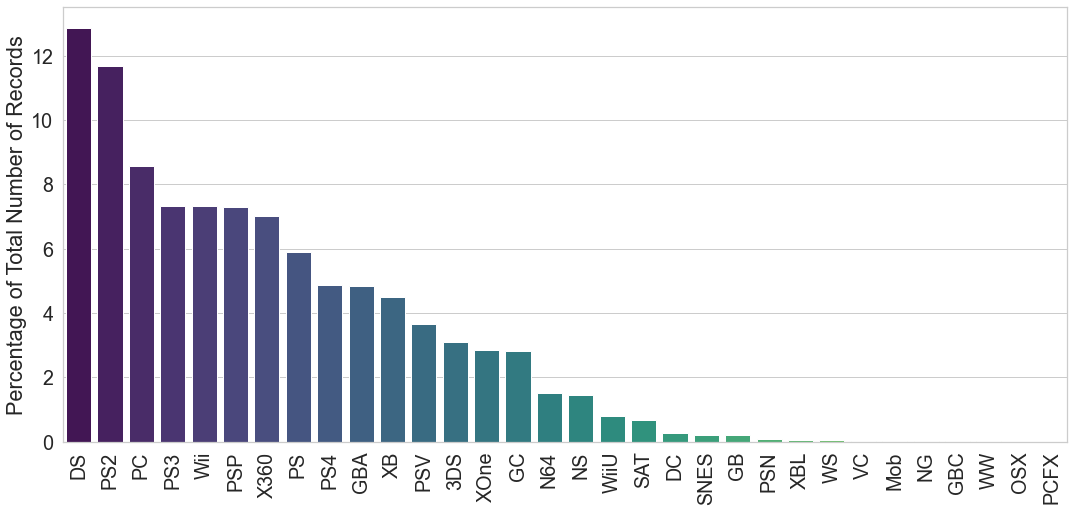

In [21]:
# Visualize in a plot
data_platform_count = data_1['Platform'].value_counts(normalize = True) * 100

plt.figure(figsize = (18, 8))
sns.barplot(x = data_platform_count.index, y = data_platform_count.values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

Based on these results we choose to select only **platforms** which account for at least 1% of the total number of records. Note that the last two ratings represent extremely small percentage of all records - all **platforms** up to **NS** included.
- **Note**: Later, we will combine platform categories denoting different console versions of **Play Station** and **XBox** as one platform for each - **PS** and **XB**, respectively.

- **Examine 'Publisher'**

In [22]:
# Get count of each platform as percentage of total number of data points

print(round(data_1['Publisher'].value_counts(normalize = True), 3) * 100)

Activision           5.4
Ubisoft              5.4
Electronic Arts      4.5
Konami               4.0
THQ                  3.9
                    ... 
FireFly Studios      0.0
Giants Software      0.0
Masque Publishing    0.0
GamersGate           0.0
Aques                0.0
Name: Publisher, Length: 691, dtype: float64


There are 710 publishers, which is an extremely large number. We will select only the top 50 publishers to work with.

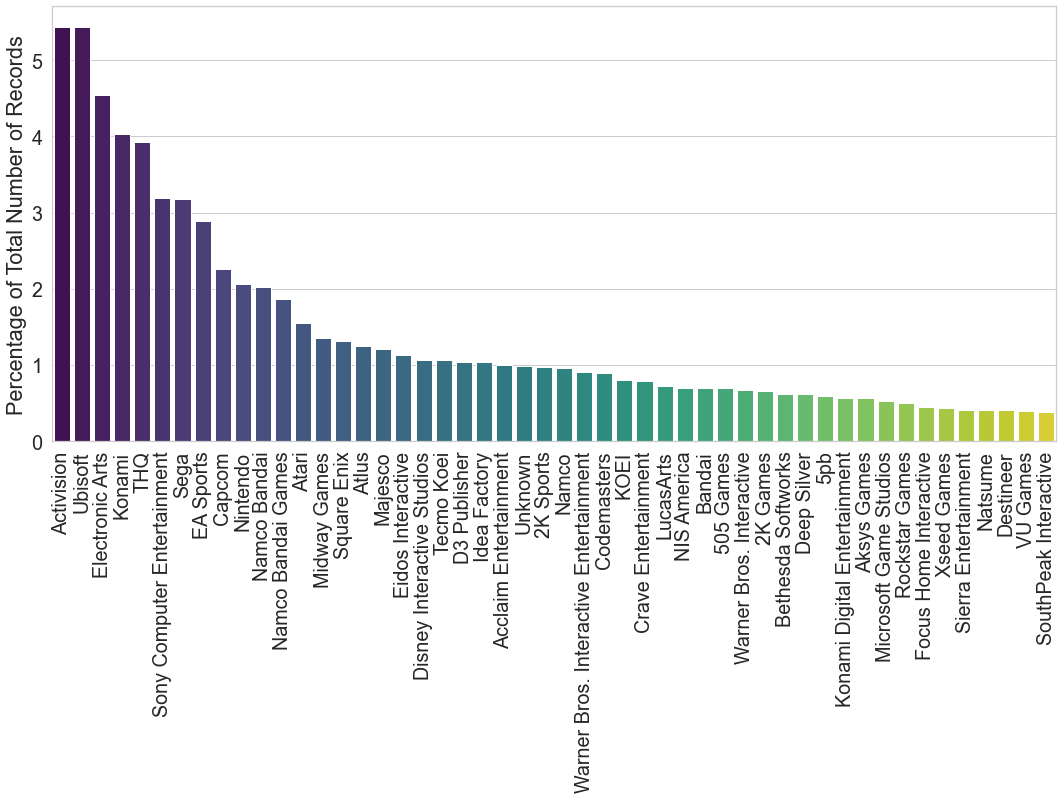

In [23]:
# Visualize in a plot --> plot only top 50
data_publisher_count = data_1['Publisher'].value_counts(normalize = True) * 100


plt.figure(figsize = (18, 8))
sns.barplot(x = data_publisher_count[0:50].index, y = data_publisher_count[0:50].values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

It appears that by selecting the top 50 the cut-off for **publishers** is approximately 0.5% which is consistent with the threshold for other features - cut-off is approximately 1/10 of the maximum number.

### 2. Select relevant features - Part 2
- **Filter data by the corresponding thresholds for 'Genre', 'ESRB_Rating', 'Platform', and 'Publisher'**

- Create filter for each of these features

In [24]:
# Genre filter at 1% threshold
freq_genre = data_1['Genre'].value_counts(normalize = True) * 100
freq_values_genre = freq_genre[freq_genre >= 1.0].index
freq_values_genre = freq_values_genre.astype(str)

# check filter
print(freq_values_genre)

Index(['Action', 'Sports', 'Misc', 'Adventure', 'Role-Playing', 'Shooter',
       'Racing', 'Simulation', 'Platform', 'Fighting', 'Strategy', 'Puzzle',
       'Action-Adventure'],
      dtype='object')


In [25]:
# ESRB_Rating filter at 1% threshold
freq_rating = data_1['ESRB_Rating'].value_counts(normalize = True) * 100
freq_values_rating = freq_rating[freq_rating >= 1.0].index
freq_values_rating = freq_values_rating.astype(str)

# check filter
print(freq_values_rating)

Index(['E', 'T', 'M', 'E10'], dtype='object')


In [26]:
# Platform filter at 1% threshold
freq_platform = data_1['Platform'].value_counts(normalize = True) * 100
freq_values_platform = freq_platform[freq_platform >= 1.0].index
freq_values_platform = freq_values_platform.astype(str)

# check filter
print(freq_values_platform)

Index(['DS', 'PS2', 'PC', 'PS3', 'Wii', 'PSP', 'X360', 'PS', 'PS4', 'GBA',
       'XB', 'PSV', '3DS', 'XOne', 'GC', 'N64', 'NS'],
      dtype='object')


In [27]:
# Publisher filter - top 50
freq_publisher = data_1['Publisher'].value_counts(normalize = True) * 100
freq_values_publisher = freq_publisher[0:50].index
freq_values_publisher = freq_values_publisher.astype(str)

# check filter
print(freq_values_publisher)

Index(['Activision', 'Ubisoft', 'Electronic Arts', 'Konami', 'THQ',
       'Sony Computer Entertainment', 'Sega', 'EA Sports', 'Capcom',
       'Nintendo', 'Namco Bandai', 'Namco Bandai Games', 'Atari',
       'Midway Games', 'Square Enix', 'Atlus', 'Majesco', 'Eidos Interactive',
       'Disney Interactive Studios', 'Tecmo Koei', 'D3 Publisher',
       'Idea Factory', 'Acclaim Entertainment', 'Unknown', '2K Sports',
       'Namco', 'Warner Bros. Interactive Entertainment', 'Codemasters',
       'KOEI', 'Crave Entertainment', 'LucasArts', 'NIS America', 'Bandai',
       '505 Games', 'Warner Bros. Interactive', '2K Games',
       'Bethesda Softworks', 'Deep Silver', '5pb',
       'Konami Digital Entertainment', 'Aksys Games', 'Microsoft Game Studios',
       'Rockstar Games', 'Focus Home Interactive', 'Xseed Games',
       'Sierra Entertainment', 'Natsume', 'Destineer', 'VU Games',
       'SouthPeak Interactive'],
      dtype='object')


- Apply filters

In [28]:
# Before applying filters, explicitely convert 'Genre', 'ESRB_Ratings', 'Platform', and 'Publisher' in data_1 to strings

data_1[['Genre', 'ESRB_Rating', 'Platform', 'Publisher']] = data_1[['Genre', 'ESRB_Rating', 
                                                                    'Platform', 'Publisher']].astype(str)

In [29]:
# Apply all of above filters in one step to create new data set, data_2

data_2 = data_1[(data_1['Genre'].isin(freq_values_genre)) & (data_1['ESRB_Rating'].isin(freq_values_rating)) 
                & (data_1['Platform'].isin(freq_values_platform)) & (data_1['Publisher'].isin(freq_values_publisher))]

data_2.reset_index(inplace = True, drop = True)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10166 entries, 0 to 10165
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10166 non-null  object 
 1   Genre         10166 non-null  object 
 2   ESRB_Rating   10166 non-null  object 
 3   Platform      10166 non-null  object 
 4   Publisher     10166 non-null  object 
 5   Global_Sales  10166 non-null  float64
 6   NA_Sales      9263 non-null   float64
 7   PAL_Sales     8914 non-null   float64
 8   JP_Sales      2404 non-null   float64
 9   Other_Sales   9866 non-null   float64
 10  Year          10166 non-null  int32  
dtypes: float64(5), int32(1), object(5)
memory usage: 834.1+ KB


- Keep 'Global_Sales' only -  we are not going to investigate sales by different markets, thus, remove all other 'Sales' features.

In [30]:
data_2.columns

Index(['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Global_Sales',
       'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year'],
      dtype='object')

In [31]:
# Select essential features --> keep 'Name' for now to do some basic checks 
features = ['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year', 'Global_Sales']

data_2 = data_2[features]
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10166 entries, 0 to 10165
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10166 non-null  object 
 1   Genre         10166 non-null  object 
 2   ESRB_Rating   10166 non-null  object 
 3   Platform      10166 non-null  object 
 4   Publisher     10166 non-null  object 
 5   Year          10166 non-null  int32  
 6   Global_Sales  10166 non-null  float64
dtypes: float64(1), int32(1), object(5)
memory usage: 516.4+ KB


In [32]:
# Show top ten records
data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80


In [33]:
# Show bottom ten records
data_2.tail(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
10156,Silent Hill: Homecoming,Action,M,PC,Konami,2008,0.0
10157,Throne of Darkness,Role-Playing,M,PC,Sierra Entertainment,2001,0.0
10158,Freedom Force vs The 3rd Reich,Role-Playing,T,PC,Sierra Entertainment,2005,0.0
10159,Total Overdose: A Gunslinger's Tale in Mexico,Shooter,M,PC,Eidos Interactive,2005,0.0
10160,Top Spin 2,Sports,E,PC,2K Sports,2007,0.0
10161,Disney Sports Motocross,Racing,E,GBA,Konami,2003,0.0
10162,Elebits: The Adventures of Kai and Zero,Action,E,DS,Konami,2009,0.0
10163,Looney Tunes Double Pack: Dizzy Driving / Acme...,Misc,E,GBA,Majesco,2005,0.0
10164,Mary-Kate and Ashley: Sweet 16 - Licenced to D...,Misc,E,GBA,Acclaim Entertainment,2002,0.0
10165,World in Conflict: Soviet Assault,Strategy,T,PC,Ubisoft,2009,0.0


There are appear that 'Global_Sales' has values equal to 0 - we will remove these values as well.

In [34]:
# Check the number of 0 values in Global_Sales
print(data_2[data_2['Global_Sales'] == 0.0]['Global_Sales'].value_counts())

0.0    363
Name: Global_Sales, dtype: int64


In [35]:
# Remove 0 values in Global_Sales
data_2 = data_2[data_2['Global_Sales'] != 0.0]

data_2.reset_index(inplace = True, drop = True)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9803 non-null   object 
 1   Genre         9803 non-null   object 
 2   ESRB_Rating   9803 non-null   object 
 3   Platform      9803 non-null   object 
 4   Publisher     9803 non-null   object 
 5   Year          9803 non-null   int32  
 6   Global_Sales  9803 non-null   float64
dtypes: float64(1), int32(1), object(5)
memory usage: 497.9+ KB


In [36]:
# Check bottom ten records
data_2.tail(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
9793,Battle B-Daman,Action,E,GBA,Atlus,2006,0.01
9794,My Hero: Firefighter,Simulation,E,DS,Majesco,2009,0.01
9795,Steel Horizon,Strategy,E10,PSP,Konami,2007,0.01
9796,Dawn of Discovery: Venice,Simulation,T,PC,Ubisoft,2010,0.01
9797,Spy Hunter: Nowhere To Run,Racing,T,XB,Midway Games,2006,0.01
9798,The Spiderwick Chronicles,Adventure,E10,PC,Sierra Entertainment,2008,0.01
9799,Medieval: Total War Gold Edition,Strategy,T,PC,Sega,2006,0.01
9800,Nancy Drew: The Deadly Secret of Olde World Park,Adventure,E,DS,Majesco,2007,0.01
9801,Donkey Kong,Platform,E,3DS,Nintendo,2011,0.01
9802,Tom Clancy's Splinter Cell,Shooter,T,PC,Ubisoft,2003,0.01


### 3. Normalization of Sales

**Arguments for the possibility of Sales normalization and the type of normalization**
If the intent is to compare sales of games releazed in different years, one needs to apply some sort of normalizations of the games sales.
- One possible normalization:
    - Divide the total sales of a game by the number of years since release. This will provide the average number of game's sales per year. However, applying such normalization has inherent bias due to the shelf life of video games. Typically, video games have their highest sales over the first few years after release. Subsequently, with few notable exceptions, sales start to decline at a lower or a greater rate. Thus, by using the number of years after release as a normalization factor games that have been published earlier are being strongly penalized. For example, let's take a game that has been released 10 years ago and has achieved 90% of its total sales in the first three years after release. With the suggested normalization the game's total sales should be divided by 10. On the other hand, the sales of a game that has been released only three years ago are divided by three, even though the subsequent years are not expected to bring significant sales for that game.
    - Thus, we will not apply this type of Sales normalization. We will, however, create a new feature accounting for the number of years since a game's release - could be useful in our modeling of data. We will count 2019 as the current year (stop year).

In [37]:
# Create new feature (column) 'Years_Since_Release' - count 2019 as the current year (stop year)
stop_year = 2019
data_2['Years_Since_Release'] = stop_year - data_2['Year']

In [38]:
data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32,6
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39,5
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15,17
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86,6
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09,4
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82,8
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74,9
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94,1
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86,7
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80,7


- Second possible normalization:
    - Divide the sales values for each game by the sales average for the game's year of release. Since, we are dividing by the average for a particular release year, it appears that the number of years since release will be implicitely taken into account.
    - To perform this normalization we will create two new features - 'Avg_Sales' and 'Norm_Sales'

In [39]:
# Create new feature (column) 'Avg_Sales' and initialize it with zeroes

data_2['Avg_Sales'] = 0.00

# check
data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32,6,0.0
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39,5,0.0
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15,17,0.0
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86,6,0.0
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09,4,0.0
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82,8,0.0
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74,9,0.0
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94,1,0.0
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86,7,0.0
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80,7,0.0


In [40]:
# Fill the correct 'Avg_Sales' values
year_values = data_2['Year'].value_counts().index

for i in year_values:
    s_avg = data_2[data_2['Year'] == i]['Global_Sales'].mean()
    print(i, s_avg)
    
    for j in data_2[data_2['Year'] == i].index:
        data_2['Avg_Sales'].iloc[j] = s_avg

2009 0.4947147470398269
2008 0.5562004405286324
2010 0.5349999999999996
2007 0.4846251588310028
2005 0.39447658402203667
2011 0.5670140845070414
2006 0.35701996927803425
2003 0.46720411663807637
2002 0.4743928571428557
2004 0.48000000000000015
2014 0.8307746478873236
2001 0.6490322580645171
2012 0.7771739130434779
2017 0.6344351464435155
2016 0.6538009049773761
2015 0.850636363636364
2000 0.6134482758620687
2013 1.0688059701492538
2018 0.6516574585635354
1999 0.6770857142857146
1998 0.7108053691275168
1997 0.6833333333333331
1996 0.5792708333333333


In [41]:
# check
data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32,6,1.068806
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39,5,0.830775
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15,17,0.474393
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86,6,1.068806
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09,4,0.850636
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82,8,0.567014
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74,9,0.535000
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94,1,0.651657
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86,7,0.777174
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80,7,0.777174


In [42]:
# Create new column 'Norm_Sales' = Global_Sales' / 'Avg_Sales'
data_2['Norm_Sales'] = data_2['Global_Sales'] / data_2['Avg_Sales']

data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32,6,1.068806,19.011870
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39,5,0.830775,23.339663
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15,17,0.474393,34.043514
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86,6,1.068806,14.838989
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09,4,0.850636,17.739660
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82,8,0.567014,26.136917
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74,9,0.535000,27.551402
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94,1,0.651657,21.391607
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86,7,0.777174,17.833846
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80,7,0.777174,17.756643


- Explore 'Global_Sales', 'Avg_Sales', and 'Norm_Sales'

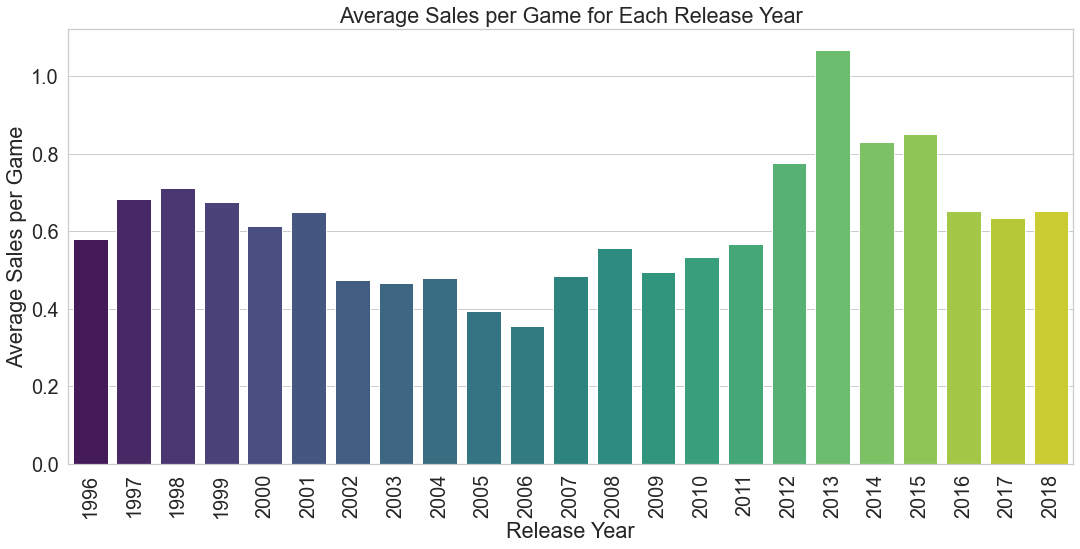

In [43]:
# Plot  'Avg_Sales' vs. release year

plt.figure(figsize = (18, 8))
sns.barplot(x = data_2['Year'].value_counts().index, y = data_2['Avg_Sales'].value_counts().index, palette = 'viridis')
plt.xlabel('Release Year')
plt.ylabel('Average Sales per Game')
plt.title('Average Sales per Game for Each Release Year')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

Clearly, there are significant variations of the average sales per game released in different years (as expected). The average sales for 2006 are the lowest and 2013 has the highest average sales number.

It would be interesting to see if the average sales are dominated by few top-selling games or they are a result of games with similar sales numbers. To examine we will plot the histograms of Global Sales for these two particular years.

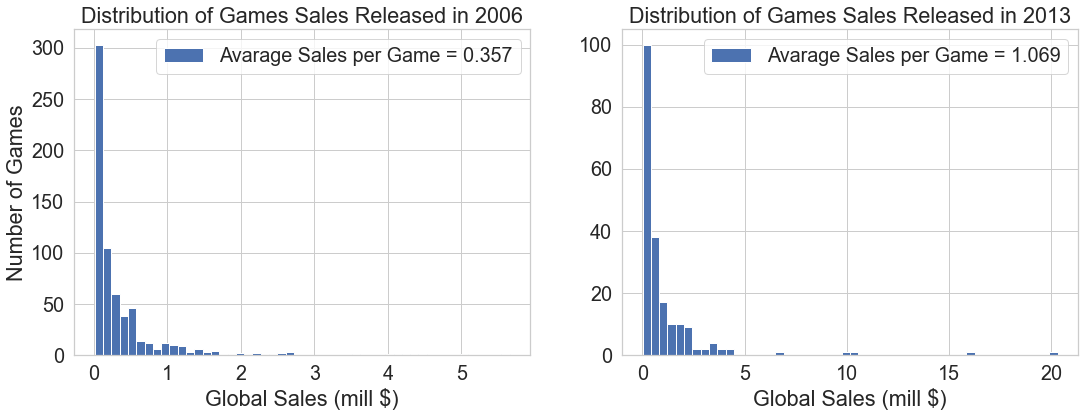

In [44]:
# Plot the histograms of Global Sales for 2006 and 2013

y_1 = 2006
y_2 = 2013

bins_1 = 50
bins_2 = 50

sales = 'Global_Sales'

sales_1 = data_2[data_2['Year'] == y_1][sales]
sales_2 = data_2[data_2['Year'] == y_2][sales]

avg_1 = round(sales_1.mean(), 3)
avg_2 = round(sales_2.mean(), 3)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey = False)
    
axes[0].hist(sales_1, bins = bins_1, label = 'Avarage Sales per Game = ' + str(avg_1))
axes[0].set(xlabel = 'Global Sales (mill $)')
axes[0].set(ylabel = 'Number of Games')
axes[0].set(title = 'Distribution of Games Sales Released in ' + str(y_1))
axes[0].legend()
    
axes[1].hist(sales_2, bins = bins_2, label = 'Avarage Sales per Game = ' + str(avg_2))
axes[1].set(xlabel = 'Global Sales (mill $)')
axes[1].set(title = 'Distribution of Games Sales Released in ' + str(y_2))
axes[1].legend()
    
plt.show()

**Observations**:
- Both distributions are qualitatively similar - large number of games have sales well below 1 mil
- However, there are large quantitative differences 
    - in 2006 there are no games with sales above 5 mill and the average sales value is 0.36
    - in 2013 there are several games with sales above 5 mill which brings the average sales value to 1.07

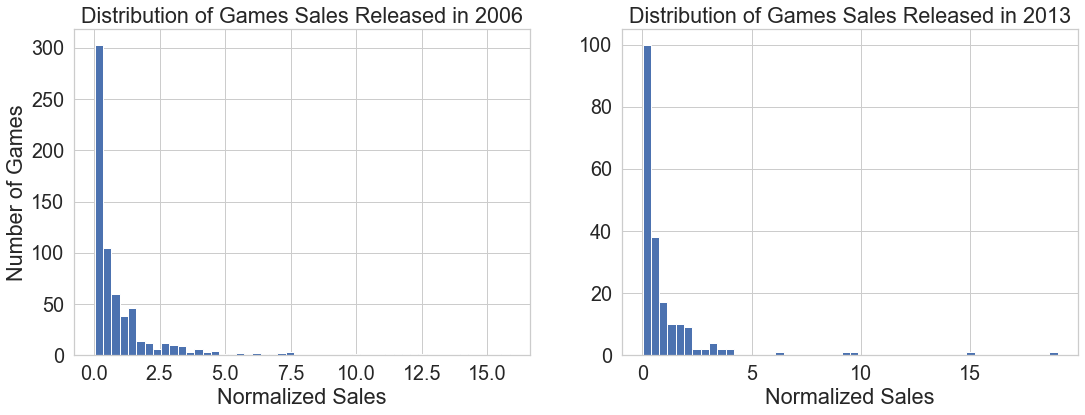

In [45]:
# Plot the histograms of Normalized Sales for 2006 and 2013

y_1 = 2006
y_2 = 2013

bins_1 = 50
bins_2 = 50

sales = 'Norm_Sales'

sales_1 = data_2[data_2['Year'] == y_1][sales]
sales_2 = data_2[data_2['Year'] == y_2][sales]

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey = False)
    
axes[0].hist(sales_1, bins = bins_1)
axes[0].set(xlabel = 'Normalized Sales')
axes[0].set(ylabel = 'Number of Games')
axes[0].set(title = 'Distribution of Games Sales Released in ' + str(y_1))
    
axes[1].hist(sales_2, bins = bins_2)
axes[1].set(xlabel = 'Normalized Sales')
axes[1].set(title = 'Distribution of Games Sales Released in ' + str(y_2))
    
plt.show()

Because of the different average sales values, this normalization results in increasing the numbers for low selling games, while penalizing high selling games (years).
That's why this normalization is not adequate for comparing games released in different years.

Thus, we decide to consider games within the same year of release and use Global Sales values to separate games in different categories/classes.

### 4. Feature Engineering and EDA

#### Categorize games by Global Sales values for each releaze year

As shown above, it is clear that sales of games from different release years cannot be compared adequately. Yet, it is important that there is an universal measure which has the same meaning across all years. This can be done by separating the games sales numbers into different categories, based on where they rank among games in a particular release year.

Naively, one possible way of categorization would be to rank games in descending order based on sales numbers as shown in the example below
- Sales Rank 1: 1-20
- Sales Rank 2: 20-50
- Sales Rank 3: 50-100
- Sales Rank 4: 100-200

It is easy to realize that this categorization is rather arbitrary and does not reflect the actual sales of a game. For example, some of the games ranked in the group 20-50 could have sales that are equal to those of games in the top 1-20. This is true for any of these groups.

**Instead, we will use the actual sales value of a game and will determine a Sales Score value to reflect its rank for each release year. As a reference point, we will use the mean of the 10 top selling games in a release year, v_cut, and will create classes based on that number as follows**:
- **Class 1 - Sales Score = 900**: 
    - games with sales 50% or greater than the reference value (sales >= v_cut/2)
- **Class 2 - Sales Score = 800**:
    - games with sales between 33% and 50% of the reference value (v_cut/2 > sales >= v_cut/3)
- **Class 3 - Sales Score = 700**:
    - games with sales between 25% and 33% of the reference value ( v_cut/3 > sales >= v_cut/4)
- **Class 4 - Sales Score = 600**:
    - games with sales between 17% and 25% of the reference value (v_cut/4 > sales >= v_cut/6)
- **Class 5 - Sales Score = 500**:
    - games with sales between 10% and 17% of the reference value (v_cut/6 > sales >= v_cut/10)
- **Class 6 - Sales Score = 400**:
    - games with sales between 5% and 10% of the reference value (v_cut/10 > sales >= v_cut/20)
- **Class 7 - Sales Score = 300**:
    - games with sales between 2% and 5% of the reference value (v_cut/20 > sales >= v_cut/50)
- **Class 8 - Sales Score = 200**:
    - games with sales between 1% and 2% of the reference value (v_cut/50 > sales >= v_cut/100)
- **Class 9 - Sales Score = 100**: 
    - games with sales below 1% of the reference value (v_cut/100 > sales)
    
**Note**: We intentionaly provide scores in the hundreds for better games differentiation.

In [46]:
# Create new data column 'Sales_Score'

data_2['Sales_Score'] = 0
data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32,6,1.068806,19.011870,0
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39,5,0.830775,23.339663,0
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15,17,0.474393,34.043514,0
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86,6,1.068806,14.838989,0
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09,4,0.850636,17.739660,0
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82,8,0.567014,26.136917,0
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74,9,0.535000,27.551402,0
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94,1,0.651657,21.391607,0
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86,7,0.777174,17.833846,0
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80,7,0.777174,17.756643,0


In [47]:
# Define function to determine the Sales Score values

def sales_category(val, v_cut):
    if val >= v_cut/2:
        score = 900
    elif val >= v_cut/3 and val < v_cut/2:
        score = 800
    elif val >= v_cut/4 and val < v_cut/3:
        score = 700
    elif val >= v_cut/6 and val < v_cut/4:
        score = 600
    elif val >= v_cut/10 and val < v_cut/6:
        score = 500
    elif val >= v_cut/20 and val < v_cut/10:
        score = 400
    elif val >= v_cut/50 and val < v_cut/20:
        score = 300
    elif val >= v_cut/100 and val < v_cut/50:
        score = 200
    else:
        score = 100
        
    return score

In [48]:
# Fill the correct 'Sales_Score' values
year_values = data_2['Year'].value_counts().index

for i in year_values:
    year = i
    sales = np.array(data_2[data_2['Year'] == year]['Global_Sales'].values)
    v_cut = sales[0:10].mean()
    sales_index = data_2[data_2['Year'] == year]['Global_Sales'].index
    print(i)
    print(len(sales))
    
    for j in range(len(sales)):
        val_j = sales[j]
        score_j = sales_category(val_j, v_cut)
        
        i_s = sales_index[j]
        
        print(j, i_s, val_j, score_j)
        
        data_2['Sales_Score'].iloc[i_s] = int(score_j) # use integers for these scores

2009
929
0 10 13.53 900
1 18 10.61 900
2 34 7.96 900
3 49 6.74 900
4 57 6.35 900
5 69 5.57 900
6 72 5.5 900
7 77 5.3 900
8 84 5.1 900
9 112 4.54 900
10 125 4.28 900
11 133 4.19 900
12 156 3.97 900
13 160 3.93 900
14 180 3.63 900
15 193 3.54 800
16 197 3.53 800
17 205 3.48 800
18 206 3.47 800
19 229 3.27 800
20 263 3.02 800
21 266 2.99 800
22 273 2.95 800
23 291 2.83 800
24 323 2.67 800
25 330 2.65 800
26 339 2.62 800
27 340 2.61 800
28 342 2.6 800
29 354 2.56 800
30 396 2.37 700
31 397 2.36 700
32 413 2.28 700
33 422 2.23 700
34 441 2.17 700
35 443 2.16 700
36 448 2.12 700
37 467 2.07 700
38 529 1.91 700
39 537 1.89 700
40 539 1.89 700
41 558 1.85 700
42 564 1.83 700
43 581 1.76 600
44 612 1.72 600
45 621 1.7 600
46 627 1.7 600
47 631 1.69 600
48 646 1.67 600
49 703 1.57 600
50 717 1.55 600
51 731 1.52 600
52 741 1.51 600
53 769 1.48 600
54 772 1.48 600
55 830 1.41 600
56 832 1.41 600
57 837 1.4 600
58 853 1.38 600
59 879 1.36 600
60 885 1.36 600
61 914 1.33 600
62 934 1.31 600
63 950 

630 6587 0.13 200
631 6594 0.13 200
632 6595 0.13 200
633 6605 0.13 200
634 6618 0.13 200
635 6619 0.13 200
636 6626 0.13 200
637 6633 0.13 200
638 6638 0.13 200
639 6641 0.13 200
640 6645 0.13 200
641 6664 0.13 200
642 6669 0.13 200
643 6678 0.13 200
644 6703 0.13 200
645 6717 0.13 200
646 6734 0.12 200
647 6742 0.12 200
648 6746 0.12 200
649 6748 0.12 200
650 6764 0.12 200
651 6801 0.12 200
652 6810 0.12 200
653 6811 0.12 200
654 6814 0.12 200
655 6826 0.12 200
656 6844 0.12 200
657 6847 0.12 200
658 6856 0.12 200
659 6862 0.12 200
660 6880 0.12 200
661 6905 0.12 200
662 6909 0.12 200
663 6912 0.12 200
664 6927 0.12 200
665 6942 0.12 200
666 6954 0.11 200
667 6958 0.11 200
668 6964 0.11 200
669 6977 0.11 200
670 6979 0.11 200
671 6991 0.11 200
672 6992 0.11 200
673 7001 0.11 200
674 7006 0.11 200
675 7012 0.11 200
676 7033 0.11 200
677 7038 0.11 200
678 7039 0.11 200
679 7054 0.11 200
680 7057 0.11 200
681 7059 0.11 200
682 7082 0.11 200
683 7087 0.11 200
684 7102 0.11 200
685 7105 0

318 3017 0.47 400
319 3024 0.46 400
320 3027 0.46 400
321 3033 0.46 400
322 3076 0.45 400
323 3088 0.45 400
324 3097 0.45 400
325 3101 0.45 400
326 3102 0.45 400
327 3105 0.45 400
328 3111 0.45 400
329 3129 0.45 400
330 3150 0.45 400
331 3153 0.45 400
332 3154 0.45 400
333 3183 0.44 400
334 3187 0.44 400
335 3208 0.44 400
336 3210 0.44 400
337 3215 0.44 400
338 3224 0.44 400
339 3237 0.43 400
340 3243 0.43 400
341 3261 0.43 400
342 3270 0.43 400
343 3272 0.43 400
344 3330 0.42 400
345 3334 0.42 400
346 3336 0.42 400
347 3403 0.41 400
348 3409 0.41 400
349 3413 0.41 400
350 3431 0.4 400
351 3435 0.4 400
352 3449 0.4 400
353 3451 0.4 400
354 3455 0.4 400
355 3461 0.4 400
356 3472 0.4 400
357 3480 0.4 400
358 3493 0.4 400
359 3496 0.4 400
360 3498 0.4 400
361 3519 0.39 400
362 3520 0.39 400
363 3523 0.39 400
364 3528 0.39 400
365 3533 0.39 400
366 3537 0.39 400
367 3543 0.39 400
368 3557 0.39 400
369 3563 0.39 400
370 3569 0.39 400
371 3571 0.39 400
372 3587 0.38 400
373 3598 0.38 400
374

878 9541 0.02 100
879 9546 0.02 100
880 9553 0.01 100
881 9561 0.01 100
882 9566 0.01 100
883 9596 0.01 100
884 9603 0.01 100
885 9607 0.01 100
886 9617 0.01 100
887 9635 0.01 100
888 9646 0.01 100
889 9649 0.01 100
890 9662 0.01 100
891 9668 0.01 100
892 9672 0.01 100
893 9675 0.01 100
894 9676 0.01 100
895 9677 0.01 100
896 9679 0.01 100
897 9701 0.01 100
898 9712 0.01 100
899 9722 0.01 100
900 9726 0.01 100
901 9750 0.01 100
902 9755 0.01 100
903 9756 0.01 100
904 9762 0.01 100
905 9780 0.01 100
906 9781 0.01 100
907 9798 0.01 100
2010
790
0 6 14.74 900
1 14 12.67 900
2 23 9.97 900
3 48 6.76 900
4 55 6.5 900
5 75 5.35 900
6 85 5.1 900
7 88 5.08 900
8 119 4.37 900
9 145 4.08 900
10 162 3.88 900
11 194 3.53 800
12 200 3.52 800
13 204 3.48 800
14 238 3.17 800
15 250 3.1 800
16 256 3.06 800
17 262 3.02 800
18 270 2.96 800
19 289 2.85 800
20 295 2.82 800
21 296 2.81 800
22 316 2.71 800
23 321 2.69 800
24 332 2.64 800
25 373 2.45 700
26 374 2.44 700
27 380 2.41 700
28 387 2.4 700
29 390 2

595 7140 0.11 200
596 7148 0.11 200
597 7158 0.11 200
598 7169 0.11 200
599 7196 0.11 200
600 7202 0.1 200
601 7207 0.1 200
602 7223 0.1 200
603 7224 0.1 200
604 7234 0.1 200
605 7240 0.1 200
606 7247 0.1 200
607 7255 0.1 200
608 7292 0.1 200
609 7305 0.1 200
610 7315 0.1 200
611 7329 0.1 200
612 7332 0.1 200
613 7340 0.1 200
614 7357 0.1 200
615 7360 0.1 200
616 7365 0.1 200
617 7367 0.1 200
618 7370 0.1 200
619 7393 0.1 200
620 7395 0.1 200
621 7438 0.1 200
622 7450 0.09 200
623 7454 0.09 200
624 7463 0.09 200
625 7477 0.09 200
626 7492 0.09 200
627 7498 0.09 200
628 7503 0.09 200
629 7525 0.09 200
630 7538 0.09 200
631 7547 0.09 200
632 7553 0.09 200
633 7556 0.09 200
634 7565 0.09 200
635 7577 0.09 200
636 7593 0.09 200
637 7595 0.09 200
638 7614 0.09 200
639 7619 0.09 200
640 7651 0.09 200
641 7675 0.09 200
642 7684 0.08 200
643 7705 0.08 200
644 7729 0.08 200
645 7769 0.08 200
646 7773 0.08 200
647 7780 0.08 200
648 7790 0.08 200
649 7798 0.08 200
650 7808 0.08 200
651 7821 0.08 

395 4754 0.25 300
396 4764 0.25 300
397 4780 0.25 300
398 4792 0.25 300
399 4812 0.25 300
400 4817 0.25 300
401 4822 0.25 300
402 4837 0.24 300
403 4886 0.24 300
404 4896 0.24 300
405 4899 0.24 300
406 4902 0.24 300
407 4916 0.24 300
408 4921 0.24 300
409 4923 0.24 300
410 4924 0.24 300
411 4929 0.24 300
412 4950 0.24 300
413 4964 0.24 300
414 4972 0.23 300
415 5010 0.23 300
416 5018 0.23 300
417 5029 0.23 300
418 5032 0.23 300
419 5034 0.23 300
420 5041 0.23 300
421 5045 0.23 300
422 5046 0.23 300
423 5055 0.23 300
424 5057 0.23 300
425 5058 0.23 300
426 5146 0.22 300
427 5150 0.22 300
428 5172 0.22 300
429 5177 0.22 300
430 5201 0.22 300
431 5222 0.21 300
432 5273 0.21 300
433 5278 0.21 300
434 5291 0.21 300
435 5316 0.21 300
436 5317 0.21 300
437 5360 0.2 300
438 5370 0.2 300
439 5392 0.2 300
440 5397 0.2 300
441 5412 0.2 300
442 5423 0.2 300
443 5440 0.2 300
444 5457 0.2 300
445 5459 0.2 300
446 5468 0.2 300
447 5492 0.19 300
448 5570 0.19 300
449 5593 0.19 300
450 5597 0.19 300
45

203 3424 0.41 400
204 3447 0.4 400
205 3452 0.4 400
206 3453 0.4 400
207 3469 0.4 400
208 3473 0.4 400
209 3478 0.4 400
210 3509 0.39 400
211 3535 0.39 400
212 3549 0.39 400
213 3550 0.39 400
214 3556 0.39 400
215 3562 0.39 400
216 3586 0.38 400
217 3602 0.38 400
218 3606 0.38 400
219 3639 0.38 400
220 3640 0.38 400
221 3655 0.37 400
222 3666 0.37 400
223 3683 0.37 400
224 3702 0.37 400
225 3728 0.36 400
226 3729 0.36 400
227 3731 0.36 400
228 3742 0.36 400
229 3769 0.36 400
230 3773 0.35 400
231 3777 0.35 400
232 3778 0.35 400
233 3811 0.35 400
234 3865 0.34 400
235 3867 0.34 400
236 3884 0.34 400
237 3900 0.34 400
238 3924 0.33 400
239 3938 0.33 400
240 3959 0.33 400
241 3976 0.33 400
242 3985 0.33 400
243 3987 0.33 400
244 4038 0.32 400
245 4040 0.32 400
246 4055 0.32 400
247 4069 0.32 400
248 4112 0.31 400
249 4115 0.31 400
250 4121 0.31 400
251 4141 0.31 400
252 4142 0.31 400
253 4162 0.31 400
254 4170 0.3 400
255 4176 0.3 400
256 4180 0.3 400
257 4183 0.3 400
258 4221 0.3 400
259

58 867 1.37 500
59 873 1.37 500
60 882 1.36 500
61 899 1.34 500
62 907 1.33 500
63 926 1.32 500
64 963 1.27 500
65 973 1.26 500
66 991 1.25 500
67 1034 1.2 500
68 1057 1.18 500
69 1063 1.18 500
70 1077 1.16 500
71 1090 1.15 500
72 1098 1.14 500
73 1102 1.14 500
74 1115 1.13 500
75 1120 1.13 500
76 1122 1.13 500
77 1133 1.12 500
78 1145 1.11 500
79 1149 1.1 500
80 1193 1.07 500
81 1214 1.06 500
82 1218 1.06 500
83 1237 1.05 500
84 1254 1.04 500
85 1257 1.04 500
86 1278 1.02 500
87 1294 1.01 500
88 1300 1.0 500
89 1313 1.0 500
90 1343 0.98 500
91 1356 0.97 500
92 1364 0.96 500
93 1365 0.96 500
94 1369 0.96 500
95 1385 0.95 500
96 1395 0.95 500
97 1396 0.95 500
98 1405 0.94 500
99 1428 0.93 500
100 1433 0.93 500
101 1466 0.91 500
102 1474 0.91 500
103 1483 0.9 500
104 1487 0.9 500
105 1490 0.9 500
106 1520 0.89 500
107 1522 0.89 500
108 1527 0.89 500
109 1538 0.88 400
110 1554 0.87 400
111 1639 0.83 400
112 1642 0.83 400
113 1647 0.83 400
114 1652 0.83 400
115 1676 0.82 400
116 1746 0.78 

647 8305 0.06 100
648 8336 0.06 100
649 8374 0.06 100
650 8384 0.06 100
651 8423 0.06 100
652 8433 0.06 100
653 8439 0.06 100
654 8457 0.05 100
655 8461 0.05 100
656 8477 0.05 100
657 8499 0.05 100
658 8524 0.05 100
659 8531 0.05 100
660 8541 0.05 100
661 8590 0.05 100
662 8591 0.05 100
663 8602 0.05 100
664 8613 0.05 100
665 8621 0.05 100
666 8658 0.05 100
667 8688 0.05 100
668 8698 0.05 100
669 8731 0.05 100
670 8775 0.04 100
671 8809 0.04 100
672 8813 0.04 100
673 8821 0.04 100
674 8827 0.04 100
675 8872 0.04 100
676 8894 0.04 100
677 8994 0.03 100
678 9010 0.03 100
679 9036 0.03 100
680 9037 0.03 100
681 9045 0.03 100
682 9049 0.03 100
683 9063 0.03 100
684 9104 0.03 100
685 9135 0.03 100
686 9178 0.03 100
687 9187 0.03 100
688 9304 0.02 100
689 9305 0.02 100
690 9401 0.02 100
691 9418 0.02 100
692 9423 0.02 100
693 9434 0.02 100
694 9583 0.01 100
695 9591 0.01 100
696 9604 0.01 100
697 9660 0.01 100
698 9661 0.01 100
699 9673 0.01 100
700 9684 0.01 100
701 9714 0.01 100
702 9721 0

550 9105 0.03 100
551 9110 0.03 100
552 9139 0.03 100
553 9155 0.03 100
554 9163 0.03 100
555 9169 0.03 100
556 9184 0.03 100
557 9190 0.03 100
558 9194 0.03 100
559 9197 0.03 100
560 9201 0.03 100
561 9207 0.03 100
562 9212 0.03 100
563 9215 0.03 100
564 9220 0.03 100
565 9221 0.03 100
566 9224 0.03 100
567 9225 0.03 100
568 9229 0.03 100
569 9240 0.03 100
570 9243 0.03 100
571 9249 0.03 100
572 9272 0.02 100
573 9280 0.02 100
574 9291 0.02 100
575 9293 0.02 100
576 9295 0.02 100
577 9306 0.02 100
578 9310 0.02 100
579 9315 0.02 100
580 9316 0.02 100
581 9318 0.02 100
582 9322 0.02 100
583 9326 0.02 100
584 9328 0.02 100
585 9333 0.02 100
586 9343 0.02 100
587 9347 0.02 100
588 9365 0.02 100
589 9381 0.02 100
590 9383 0.02 100
591 9397 0.02 100
592 9408 0.02 100
593 9410 0.02 100
594 9419 0.02 100
595 9428 0.02 100
596 9431 0.02 100
597 9433 0.02 100
598 9435 0.02 100
599 9436 0.02 100
600 9441 0.02 100
601 9445 0.02 100
602 9446 0.02 100
603 9454 0.02 100
604 9461 0.02 100
605 9474 0

492 8536 0.05 200
493 8558 0.05 200
494 8562 0.05 200
495 8574 0.05 200
496 8617 0.05 200
497 8627 0.05 200
498 8660 0.05 200
499 8665 0.05 200
500 8686 0.05 200
501 8717 0.05 200
502 8722 0.05 200
503 8724 0.05 200
504 8772 0.04 100
505 8789 0.04 100
506 8796 0.04 100
507 8806 0.04 100
508 8847 0.04 100
509 8851 0.04 100
510 8865 0.04 100
511 8866 0.04 100
512 8876 0.04 100
513 8878 0.04 100
514 8905 0.04 100
515 8908 0.04 100
516 8915 0.04 100
517 8945 0.04 100
518 8972 0.04 100
519 9012 0.03 100
520 9013 0.03 100
521 9016 0.03 100
522 9018 0.03 100
523 9027 0.03 100
524 9028 0.03 100
525 9032 0.03 100
526 9035 0.03 100
527 9039 0.03 100
528 9059 0.03 100
529 9083 0.03 100
530 9107 0.03 100
531 9112 0.03 100
532 9125 0.03 100
533 9128 0.03 100
534 9132 0.03 100
535 9137 0.03 100
536 9143 0.03 100
537 9151 0.03 100
538 9156 0.03 100
539 9183 0.03 100
540 9188 0.03 100
541 9191 0.03 100
542 9193 0.03 100
543 9195 0.03 100
544 9200 0.03 100
545 9202 0.03 100
546 9205 0.03 100
547 9206 0

531 9395 0.02 100
532 9405 0.02 100
533 9425 0.02 100
534 9437 0.02 100
535 9450 0.02 100
536 9458 0.02 100
537 9460 0.02 100
538 9465 0.02 100
539 9469 0.02 100
540 9471 0.02 100
541 9484 0.02 100
542 9497 0.02 100
543 9499 0.02 100
544 9500 0.02 100
545 9530 0.02 100
546 9551 0.01 100
547 9568 0.01 100
548 9577 0.01 100
549 9578 0.01 100
550 9592 0.01 100
551 9608 0.01 100
552 9638 0.01 100
553 9671 0.01 100
554 9698 0.01 100
555 9702 0.01 100
556 9716 0.01 100
557 9732 0.01 100
558 9771 0.01 100
559 9776 0.01 100
2004
524
0 45 6.9 900
1 113 4.53 900
2 130 4.23 900
3 172 3.7 900
4 182 3.61 900
5 213 3.41 900
6 281 2.9 900
7 285 2.89 900
8 293 2.83 900
9 322 2.68 900
10 337 2.62 900
11 347 2.59 900
12 350 2.57 900
13 394 2.37 900
14 395 2.37 900
15 406 2.31 900
16 412 2.28 900
17 446 2.13 900
18 470 2.06 900
19 522 1.93 900
20 526 1.92 900
21 542 1.88 800
22 550 1.86 800
23 557 1.85 800
24 571 1.81 800
25 585 1.76 800
26 586 1.76 800
27 590 1.76 800
28 594 1.75 800
29 610 1.72 800
30 

81 1983 0.7 400
82 2019 0.69 400
83 2052 0.68 400
84 2057 0.68 400
85 2087 0.66 400
86 2096 0.66 400
87 2100 0.66 400
88 2112 0.66 400
89 2116 0.66 400
90 2123 0.66 400
91 2132 0.65 400
92 2154 0.65 400
93 2166 0.64 400
94 2177 0.64 400
95 2240 0.62 400
96 2264 0.62 400
97 2285 0.61 400
98 2314 0.61 400
99 2362 0.59 400
100 2368 0.59 400
101 2388 0.59 400
102 2411 0.58 400
103 2418 0.58 400
104 2463 0.57 400
105 2491 0.57 400
106 2501 0.56 400
107 2537 0.56 400
108 2559 0.55 400
109 2563 0.55 400
110 2636 0.54 400
111 2656 0.53 400
112 2714 0.52 400
113 2723 0.52 400
114 2733 0.52 400
115 2777 0.51 400
116 2844 0.5 400
117 2867 0.49 400
118 2877 0.49 400
119 2894 0.49 400
120 2916 0.48 400
121 2945 0.48 400
122 2954 0.48 400
123 2956 0.47 400
124 3063 0.46 400
125 3074 0.46 400
126 3077 0.45 400
127 3094 0.45 400
128 3136 0.45 400
129 3173 0.44 400
130 3178 0.44 400
131 3207 0.44 400
132 3278 0.43 400
133 3319 0.42 400
134 3344 0.42 400
135 3457 0.4 400
136 3526 0.39 400
137 3591 0.38 

132 3184 0.44 400
133 3251 0.43 400
134 3264 0.43 400
135 3348 0.42 400
136 3383 0.41 400
137 3402 0.41 400
138 3440 0.4 400
139 3483 0.4 400
140 3495 0.4 400
141 3564 0.39 400
142 3572 0.39 400
143 3578 0.38 400
144 3611 0.38 400
145 3638 0.38 400
146 3648 0.37 400
147 3653 0.37 400
148 3826 0.35 400
149 3833 0.34 400
150 3863 0.34 400
151 3894 0.34 400
152 3903 0.33 400
153 3943 0.33 400
154 3995 0.33 400
155 4002 0.32 300
156 4009 0.32 300
157 4025 0.32 300
158 4062 0.32 300
159 4087 0.32 300
160 4088 0.31 300
161 4101 0.31 300
162 4114 0.31 300
163 4187 0.3 300
164 4200 0.3 300
165 4222 0.3 300
166 4244 0.3 300
167 4319 0.29 300
168 4331 0.29 300
169 4386 0.28 300
170 4486 0.27 300
171 4497 0.27 300
172 4550 0.27 300
173 4608 0.26 300
174 4612 0.26 300
175 4621 0.26 300
176 4644 0.26 300
177 4682 0.26 300
178 4706 0.26 300
179 4749 0.25 300
180 4793 0.25 300
181 4802 0.25 300
182 4839 0.24 300
183 4845 0.24 300
184 4852 0.24 300
185 4939 0.24 300
186 4960 0.24 300
187 5001 0.23 300

220 9787 0.01 100
2015
220
0 4 15.09 900
1 30 8.48 900
2 31 8.22 900
3 32 8.03 900
4 39 7.37 900
5 74 5.39 900
6 90 5.03 900
7 136 4.15 900
8 142 4.11 900
9 155 3.98 900
10 184 3.6 900
11 203 3.49 800
12 225 3.3 800
13 230 3.25 800
14 260 3.04 800
15 314 2.72 800
16 317 2.71 800
17 355 2.55 800
18 371 2.47 800
19 372 2.45 800
20 382 2.41 800
21 440 2.18 700
22 444 2.15 700
23 495 2.01 700
24 503 1.98 700
25 514 1.95 700
26 535 1.9 700
27 599 1.74 600
28 603 1.74 600
29 680 1.62 600
30 696 1.59 600
31 701 1.58 600
32 803 1.44 600
33 843 1.4 600
34 947 1.29 600
35 966 1.27 600
36 997 1.24 600
37 1036 1.2 600
38 1056 1.18 600
39 1060 1.18 600
40 1275 1.02 500
41 1284 1.01 500
42 1285 1.01 500
43 1287 1.01 500
44 1290 1.01 500
45 1293 1.01 500
46 1296 1.01 500
47 1497 0.9 500
48 1517 0.89 500
49 1558 0.87 500
50 1603 0.85 500
51 1612 0.85 500
52 1650 0.83 500
53 1679 0.82 500
54 1690 0.81 500
55 1692 0.81 500
56 1693 0.81 500
57 1732 0.79 500
58 1750 0.78 500
59 1871 0.74 500
60 1931 0.72 

178 7554 0.09 200
179 7743 0.08 100
180 7814 0.08 100
181 7926 0.08 100
182 8155 0.07 100
183 8188 0.06 100
184 8192 0.06 100
185 8275 0.06 100
186 8287 0.06 100
187 8560 0.05 100
188 8566 0.05 100
189 8604 0.05 100
190 8610 0.05 100
191 8707 0.05 100
192 8880 0.04 100
193 9109 0.03 100
194 9130 0.03 100
195 9149 0.03 100
196 9176 0.03 100
197 9457 0.02 100
198 9621 0.01 100
199 9636 0.01 100
200 9667 0.01 100
2018
181
0 7 13.94 900
1 25 9.32 900
2 26 9.15 900
3 64 5.77 900
4 97 4.85 900
5 107 4.67 900
6 110 4.57 900
7 157 3.95 900
8 237 3.18 900
9 313 2.73 800
10 336 2.63 800
11 423 2.22 800
12 425 2.22 800
13 486 2.04 700
14 580 1.78 700
15 604 1.74 700
16 606 1.74 700
17 720 1.55 600
18 791 1.46 600
19 851 1.39 600
20 918 1.32 600
21 1137 1.11 600
22 1350 0.97 500
23 1431 0.93 500
24 1441 0.93 500
25 1514 0.89 500
26 1678 0.82 500
27 1744 0.78 500
28 1847 0.75 500
29 1915 0.72 500
30 2025 0.69 500
31 2140 0.65 500
32 2207 0.63 500
33 2404 0.58 400
34 2458 0.57 400
35 2485 0.57 400
3

89 7570 0.09 300
90 7665 0.09 300
91 7951 0.07 300
92 8089 0.07 300
93 8161 0.07 300
94 8214 0.06 200
95 8304 0.06 200
96 8364 0.06 200
97 8695 0.05 200
98 8726 0.05 200
99 8882 0.04 200
100 8886 0.04 200
101 8918 0.04 200
102 8924 0.04 200
103 9108 0.03 100
104 9117 0.03 100
105 9211 0.03 100
106 9256 0.03 100
107 9301 0.02 100
108 9349 0.02 100
109 9438 0.02 100
110 9462 0.02 100
1996
96
0 66 5.74 900
1 109 4.63 900
2 165 3.84 900
3 303 2.79 900
4 376 2.44 900
5 562 1.83 900
6 841 1.4 900
7 925 1.32 900
8 1064 1.17 800
9 1072 1.17 800
10 1207 1.07 800
11 1268 1.03 800
12 1306 1.0 800
13 1309 1.0 800
14 1366 0.96 800
15 1406 0.94 800
16 1452 0.92 800
17 1460 0.92 800
18 1546 0.88 800
19 1563 0.87 700
20 1602 0.85 700
21 1614 0.85 700
22 1673 0.82 700
23 1777 0.77 700
24 1803 0.76 700
25 1917 0.72 700
26 2069 0.67 700
27 2234 0.62 600
28 2324 0.6 600
29 2465 0.57 600
30 2581 0.55 600
31 2699 0.53 600
32 2758 0.51 600
33 3012 0.47 600
34 3055 0.46 600
35 3126 0.45 600
36 3266 0.43 500
3

In [49]:
# Check top scores
data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32,6,1.068806,19.011870,900
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39,5,0.830775,23.339663,900
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15,17,0.474393,34.043514,900
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86,6,1.068806,14.838989,900
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09,4,0.850636,17.739660,900
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82,8,0.567014,26.136917,900
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74,9,0.535000,27.551402,900
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94,1,0.651657,21.391607,900
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86,7,0.777174,17.833846,900
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80,7,0.777174,17.756643,900


In [50]:
# Check middle scores
data_2.loc[4000:4010, :]

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score
4000,Elebits,Action,E,Wii,Konami,2006,0.32,13,0.357020,0.896308,400
4001,Nicktoons: Movin,Action,E,PS2,THQ,2004,0.32,15,0.480000,0.666667,400
4002,Silent Hill: Downpour,Adventure,M,X360,Konami,2012,0.32,7,0.777174,0.411748,300
4003,Power Rangers Samurai,Action,E10,Wii,Namco Bandai,2011,0.32,8,0.567014,0.564360,300
4004,SWAT: Global Strike Team,Shooter,M,PS2,Sierra Entertainment,2003,0.32,16,0.467204,0.684925,400
4005,Battlestations: Pacific,Strategy,T,X360,Eidos Interactive,2009,0.32,10,0.494715,0.646837,300
4006,Championship Bass,Sports,E,PS,EA Sports,2000,0.32,19,0.613448,0.521641,400
4007,Golden Axe: Beast Rider,Action,M,PS3,Sega,2008,0.32,11,0.556200,0.575332,300
4008,Dead Rising 2: Off the Record,Action,M,PS3,Capcom,2011,0.32,8,0.567014,0.564360,300
4009,Silent Hill HD Collection,Action,M,PS3,Konami Digital Entertainment,2012,0.32,7,0.777174,0.411748,300


In [51]:
# Check bottom scores
data_2.tail(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score
9793,Battle B-Daman,Action,E,GBA,Atlus,2006,0.01,13,0.357020,0.028010,100
9794,My Hero: Firefighter,Simulation,E,DS,Majesco,2009,0.01,10,0.494715,0.020214,100
9795,Steel Horizon,Strategy,E10,PSP,Konami,2007,0.01,12,0.484625,0.020635,100
9796,Dawn of Discovery: Venice,Simulation,T,PC,Ubisoft,2010,0.01,9,0.535000,0.018692,100
9797,Spy Hunter: Nowhere To Run,Racing,T,XB,Midway Games,2006,0.01,13,0.357020,0.028010,100
9798,The Spiderwick Chronicles,Adventure,E10,PC,Sierra Entertainment,2008,0.01,11,0.556200,0.017979,100
9799,Medieval: Total War Gold Edition,Strategy,T,PC,Sega,2006,0.01,13,0.357020,0.028010,100
9800,Nancy Drew: The Deadly Secret of Olde World Park,Adventure,E,DS,Majesco,2007,0.01,12,0.484625,0.020635,100
9801,Donkey Kong,Platform,E,3DS,Nintendo,2011,0.01,8,0.567014,0.017636,100
9802,Tom Clancy's Splinter Cell,Shooter,T,PC,Ubisoft,2003,0.01,16,0.467204,0.021404,100


We have successfuly created new feature to separate games by the sales score of each game in a particular release year!

**Next step**: Since we want to determine which categories in 'Genre', 'Platfrom', 'ESRB_Rating' and 'Publisher' are most successful we will create scores for each of these features as well - the score will be the average of the Sales Score for a particular feature value in a release year.

- First, in 'Platform' denote all versions of the PlayStation console as 'PS', and all versions of the XB console as 'XB'

In [52]:
print(data_2['Platform'].value_counts().index)

Index(['PS2', 'DS', 'X360', 'PS3', 'Wii', 'XB', 'PS', 'PSP', 'PC', 'GBA', 'GC',
       'PS4', '3DS', 'XOne', 'N64', 'PSV', 'NS'],
      dtype='object')


In [53]:
# Replace the notations for different generations of the PS and XB consoles with PS and XB, respectively
data_2['Platform'].replace({'PS2':'PS', 'PS3':'PS', 'PS4':'PS', 'X360':'XB', 'XOne':'XB'}, inplace=True)

print(data_2['Platform'].value_counts().index)

Index(['PS', 'XB', 'DS', 'Wii', 'PSP', 'PC', 'GBA', 'GC', '3DS', 'N64', 'PSV',
       'NS'],
      dtype='object')


In [54]:
# Check

data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,6,1.068806,19.011870,900
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,5,0.830775,23.339663,900
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,17,0.474393,34.043514,900
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,6,1.068806,14.838989,900
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,4,0.850636,17.739660,900
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,8,0.567014,26.136917,900
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,9,0.535000,27.551402,900
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,1,0.651657,21.391607,900
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,7,0.777174,17.833846,900
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,7,0.777174,17.756643,900


- Create four new features - 'Genre_Score', 'ESRB_Rating_Score', 'Platform_Score', and 'Publisher_Score'

In [55]:
data_2[['Genre_Score', 'ESRB_Rating_Score', 'Platform_Score', 'Publisher_Score']] = 0

data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score,Genre_Score,ESRB_Rating_Score,Platform_Score,Publisher_Score
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,6,1.068806,19.011870,900,0,0,0,0
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,5,0.830775,23.339663,900,0,0,0,0
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,17,0.474393,34.043514,900,0,0,0,0
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,6,1.068806,14.838989,900,0,0,0,0
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,4,0.850636,17.739660,900,0,0,0,0
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,8,0.567014,26.136917,900,0,0,0,0
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,9,0.535000,27.551402,900,0,0,0,0
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,1,0.651657,21.391607,900,0,0,0,0
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,7,0.777174,17.833846,900,0,0,0,0
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,7,0.777174,17.756643,900,0,0,0,0


In [56]:
# Define function to fill the correct Feature_Score values for the corresponding feature
data = data_2
year_values = data_2['Year'].value_counts().index

def get_feat_score(data, year_values, feat, feat_score):
    for y in year_values:
        feat_values = data[data['Year'] == y][feat].value_counts().index
        
        for f_val in feat_values:
            score = data[data['Year'] == y][data[feat] == f_val]['Sales_Score'].mean()
            f_index = data[data['Year'] == y][data[feat] == f_val]['Sales_Score'].index
            
            for j in f_index:
                data[feat_score].iloc[j] = int(score) # use integer here since we will be performing classification

In [57]:
# Fill the correct 'Genre_Score' values

feat = 'Genre'
feat_score = 'Genre_Score'

get_feat_score(data, year_values, feat, feat_score)

In [58]:
# Fill the correct 'ESRB_Rating_Score' values

feat = 'ESRB_Rating'
feat_score = 'ESRB_Rating_Score'

get_feat_score(data, year_values, feat, feat_score)

In [59]:
# Fill the correct 'Platform_Score' values

feat = 'Platform'
feat_score = 'Platform_Score'

get_feat_score(data, year_values, feat, feat_score)

In [60]:
# Fill the correct 'Publisher_Score' values

feat = 'Publisher'
feat_score = 'Publisher_Score'

get_feat_score(data, year_values, feat, feat_score)

In [61]:
# Check

data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score,Genre_Score,ESRB_Rating_Score,Platform_Score,Publisher_Score
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,6,1.068806,19.011870,900,397,477,469,900
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,5,0.830775,23.339663,900,362,414,418,900
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,17,0.474393,34.043514,900,366,424,438,475
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,6,1.068806,14.838989,900,397,477,437,900
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,4,0.850636,17.739660,900,506,445,458,353
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,8,0.567014,26.136917,900,383,411,337,294
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,9,0.535000,27.551402,900,372,423,400,320
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,1,0.651657,21.391607,900,410,380,361,900
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,7,0.777174,17.833846,900,470,434,426,424
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,7,0.777174,17.756643,900,470,434,457,424


In [62]:
# Check for particular year - 'Genre'
y = 2002
feat = 'Genre'
f_value = 'Action'

avg_score = data_2[data_2['Year'] == y][data_2[feat] == f_value]['Sales_Score'].mean()
print(feat + ' ' + f_value + ' Average Score in ' + str(y) + ': ', round(avg_score, 2))

Genre Action Average Score in 2002:  366.22


In [63]:
# Check for particular year - 'ESRB_Rating'
y = 2010
feat = 'ESRB_Rating'
f_value = 'M'

avg_score = data_2[data_2['Year'] == y][data_2[feat] == f_value]['Sales_Score'].mean()
print(feat + ' ' + f_value + ' Average Score in ' + str(y) + ': ', round(avg_score, 2))

ESRB_Rating M Average Score in 2010:  423.58


In [64]:
# Check for particular year - 'Platform'
y = 2011
feat = 'Platform'
f_value = 'XB'

avg_score = data_2[data_2['Year'] == y][data_2[feat] == f_value]['Sales_Score'].mean()
print(feat + ' ' + f_value + ' Average Score in ' + str(y) + ': ', round(avg_score, 2))

Platform XB Average Score in 2011:  337.65


In [65]:
# Check for particular year - 'Publisher'
y = 2014
feat = 'Publisher'
f_value = 'Rockstar Games'

avg_score = data_2[data_2['Year'] == y][data_2[feat] == f_value]['Sales_Score'].mean()
print(feat + ' ' + f_value + ' Average Score in ' + str(y) + ': ', round(avg_score, 2))

Publisher Rockstar Games Average Score in 2014:  900.0


We have correctly filled the score values for the corresponding features! Let's examine their behavior over the first (1996-2007) and the second (2008-2018) halves of our data. We believe that the most appropriate way to do this is to use boxplots. 

In [66]:
# Define function for boxplots of Feature_Score vs Feature for each half of our data

# set vertical axis limits
y_min = 100
y_max = 700

# define function for the plots 
def feat_score_boxplot(feat, feat_score, y_min, y_max):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey = False)
    
    sns.boxplot(x = feat, y = feat_score, data = data_2[data_2['Year'] < 2008], palette = 'viridis', ax = axes[0])
    axes[0].tick_params(axis = 'x', rotation = 90)
    axes[0].set_ylim([y_min, y_max])
    axes[0].set(title = feat_score + ' vs. ' + feat + ': 1996-2007')
    
    sns.boxplot(x = feat, y = feat_score, data = data_2[data_2['Year'] >= 2008], palette = 'viridis', ax = axes[1])
    axes[1].tick_params(axis = 'x', rotation = 90)
    axes[1].set(ylabel = None)
    axes[1].set_ylim([y_min, y_max])
    axes[1].set(title = feat_score + ' vs. ' + feat + ': 2008-2018')

- **Boxplot of Genre_Score vs. Genre**

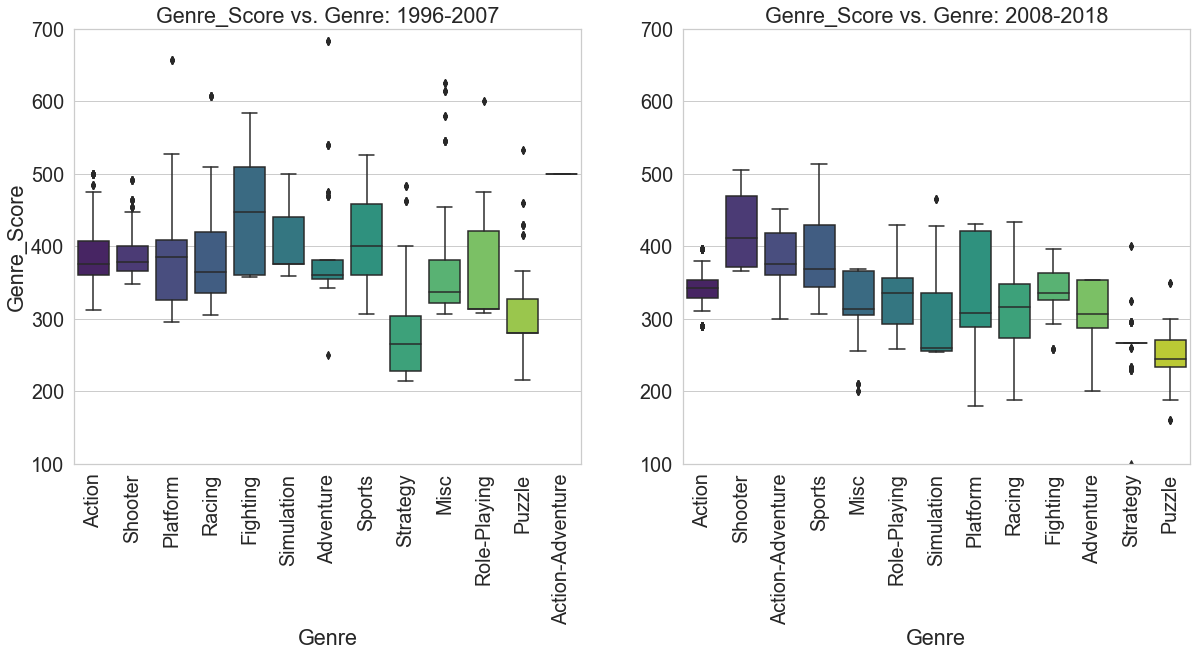

In [67]:
# Plot Genre_Score vs. Genre

y_min = 100
y_max = 700

feat = 'Genre'
feat_score = 'Genre_Score'

feat_score_boxplot(feat, feat_score, y_min, y_max)

**Observations**:
- There are genres with very large spread of scores - indicates that there are many games which are either hit or miss
- 1996-2007 - **Action-Adventure** genre has top score (exactly the same over all years!), with **Fighting** and **Sports** genres ranking second and third
- 2008-2018 - the new king of the hill is the **Shooter** genre, **Action-Adventure** slips down a notch and **Sports** rounds the top three genres

- **Boxplot of ESRB_Rating_Score vs. ESRB_Rating**

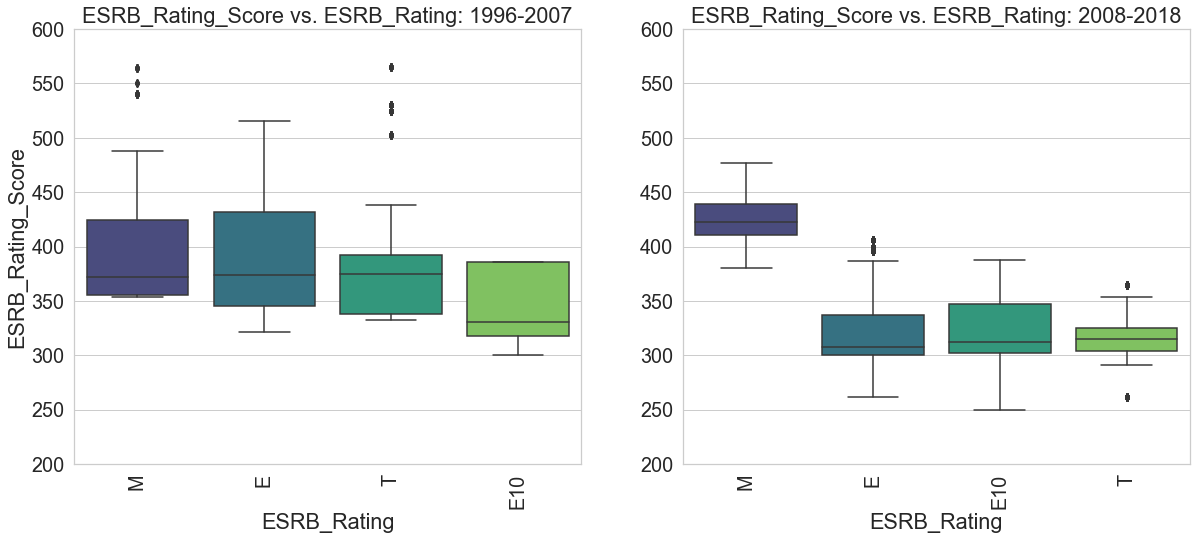

In [68]:
# Plot ESRB_Rating_Score vs. ESRB_Rating

y_min = 200
y_max = 600

feat = 'ESRB_Rating'
feat_score = 'ESRB_Rating_Score'

feat_score_boxplot(feat, feat_score, y_min, y_max)

**Observations**
- 1996-2007 - all ratings scores are close with a similar spread
- 2008-2018 - the games with Mature rating (M) pull ahead of the group with slight drop in scores for the rest (indicates lower sales on average for this period); the score spread is tighter

- **Boxplot of Platform_Score vs. Platform**

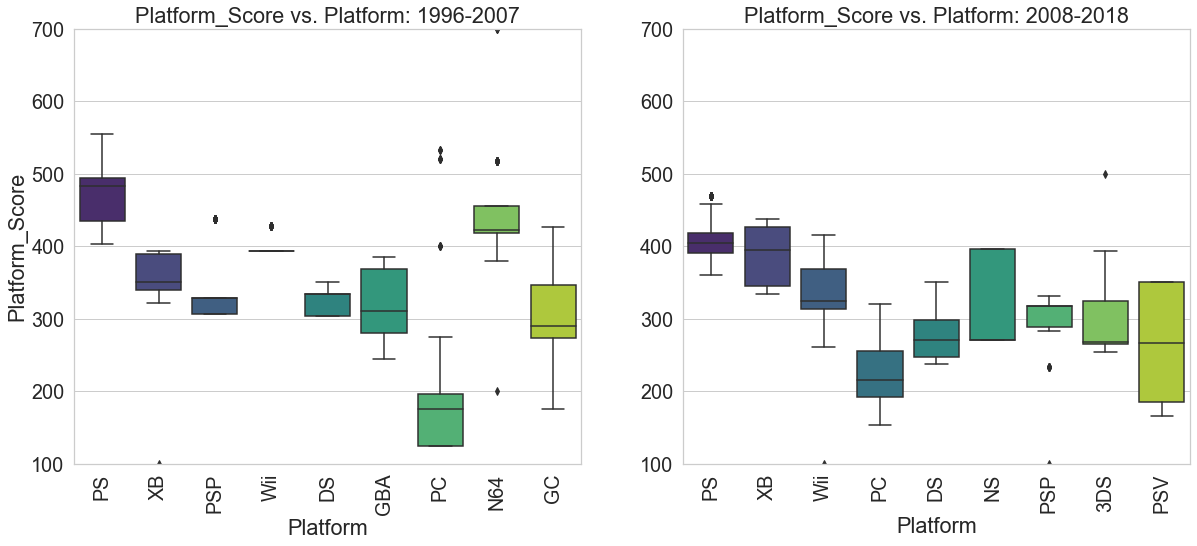

In [69]:
# Plot Platform_Score vs. Platform

y_min = 100
y_max = 700

feat = 'Platform'
feat_score = 'Platform_Score'

feat_score_boxplot(feat, feat_score, y_min, y_max)

**Observations**
- 1996-2007 - **PlayStation (PS)** and **Nintendo (N64)** rule this period
- 2008-2018 - **PlayStation (PS)** stays on top; **Microsoft XBox** is the second top platform; **Nintendo** has slipped to third, but still doing wel with its two new platforms **Wii** and **Nintendo Switch (NS)**
- Re **PC** games: For me personally, it is a surprise that **PC** ranks last in both periods. One possible explanation is that it is relatively easier and faster to develop PC game (a single person can do it) and many low budged developers are churning low quality games by the dozens.

**Comments on above observations**:

After observing the changes in Genre, ESRB Rating, and Platform from 1996-2007 to 2008-2018, one might be tempted to recommend developing Mature games with "Shooter" or "Sport" genres for PlayStation or XBox. And they could be correct. However, it is clear that the games success is not determined by a single feaure on its own, but by the most successful combinations of Genre, Rating and Platform. So, examinining the best possible combinations is critical.

We will do that later by using a Machine Learning algorithm to create a model for predicting the most successful combinations. One perhaps can achieve the same by performing statistical analyses taking into account all features values and interactions. However, since there are number of features, some of them with large number of values (Publisher), these analyses will be extremely complex and not very reliable.

In order to determine the most successful combinations of features we will create one last feature, Game_Score, which will be combination of Sales_Score, Genre_Score, ESRB_Rating_Score, Platform_Score, and Publisher_Score

In [70]:
# Create new feature Game_Score: sum of 'Sales_Score', 'Genre_Score', 'ESRB_Rating_Score', 'Platform_Score', and 'Publisher_Score'
data_2['Game_Score'] = data_2['Sales_Score'] + data_2['Genre_Score'] + data_2['ESRB_Rating_Score'] + data_2['Platform_Score'] + data_2['Publisher_Score']

data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score,Genre_Score,ESRB_Rating_Score,Platform_Score,Publisher_Score,Game_Score
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,6,1.068806,19.011870,900,397,477,469,900,3143
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,5,0.830775,23.339663,900,362,414,418,900,2994
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,17,0.474393,34.043514,900,366,424,438,475,2603
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,6,1.068806,14.838989,900,397,477,437,900,3111
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,4,0.850636,17.739660,900,506,445,458,353,2662
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,8,0.567014,26.136917,900,383,411,337,294,2325
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,9,0.535000,27.551402,900,372,423,400,320,2415
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,1,0.651657,21.391607,900,410,380,361,900,2951
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,7,0.777174,17.833846,900,470,434,426,424,2654
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,7,0.777174,17.756643,900,470,434,457,424,2685


Let's examine Game_Score properties and relationship to the Sales_Score

In [71]:
# Import package to be able to create a theoretical normal distribution 

from scipy.stats import norm

- Plot the histogram of Game_Score for all years

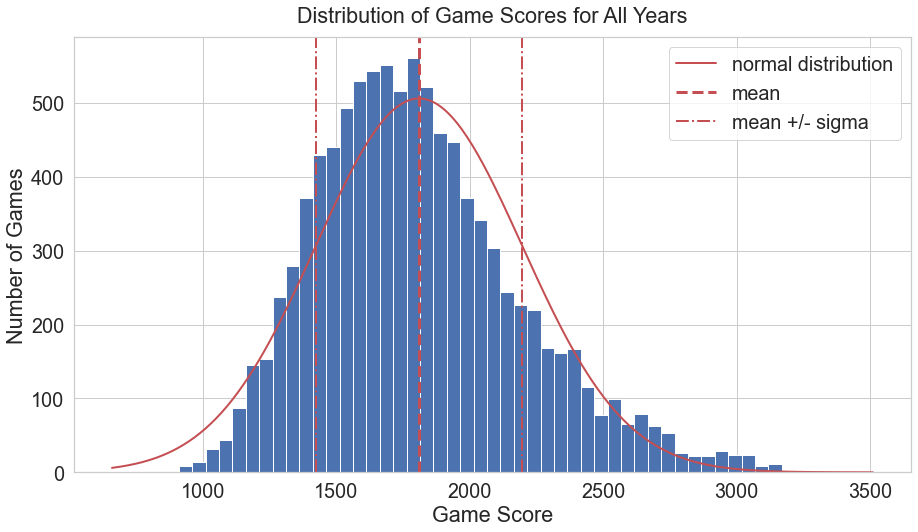

In [72]:
game_score = data_2['Game_Score'].values

m_score = game_score.mean()
s_score = game_score.std()
n_p = len(game_score)

# define appropriate bin size
bin_size = 50
n_bins = int((game_score.max() - game_score.min()) // bin_size) # make sure to define it as an integer

# Set x-axis limits - adjust accordingly
x_min = int(game_score.min()) - 100
x_max = int(game_score.max()) + 100

# define x-values for the theoretical normal distribution with appropriate means
x_th = np.arange(x_min, x_max, 10)
# scaling factor for the theoretical normal distribution to match the area of the real distribution
a = n_p * bin_size

plt.figure(figsize = (15, 8))

plt.hist(game_score, bins = n_bins)
plt.plot(x_th, a * norm.pdf(x_th, loc = m_score, scale = s_score), color = 'r', lw = 2, label = 'normal distribution')
plt.axvline(m_score, color='r', linestyle = '--', lw = 3, label = 'mean')
plt.axvline(m_score - s_score, color='r', linestyle = '-.', lw = 2, label = 'mean +/- sigma')
plt.axvline(m_score + s_score, color='r', linestyle = '-.', lw = 2)
plt.xlabel('Game Score')
plt.ylabel('Number of Games')
plt.title('Distribution of Game Scores for All Years', pad = 15)
plt.legend()

plt.show()

The Game_Score distribution clearly deviates from the corresponding normal distribution. However, the similarity suggest that it is possible to separate the games in classes based on their scores - e.g. above one sigma from the mean, within one sigma from the mean, and below one sigma from the mean - that can be used with a classification model.

- Scatter plot of Global_Sales vs. Game_Score for all years to determine their relationship and possibility of suggested games separation

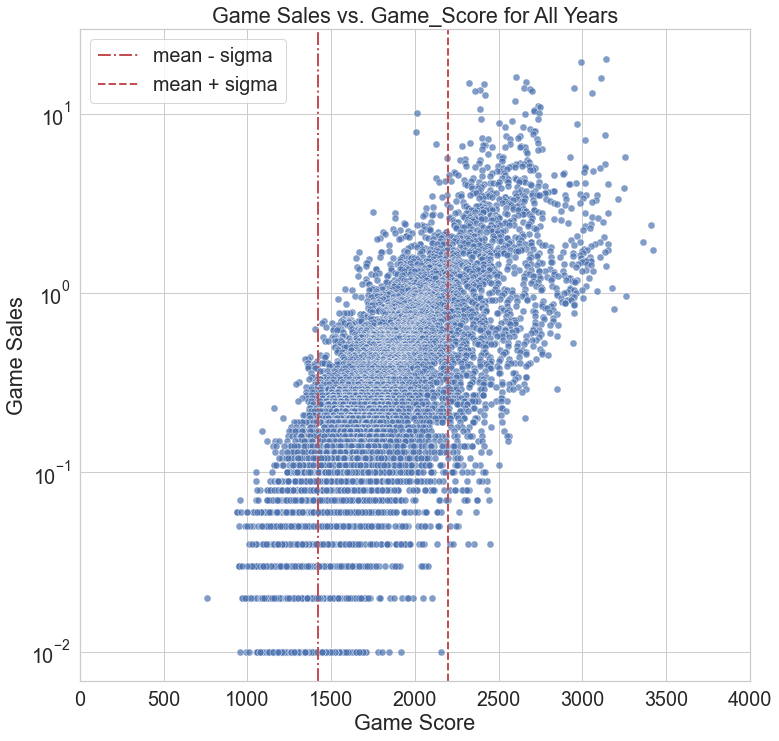

In [73]:
# get data
x1 = data_2['Game_Score'].values
y1 = data_2['Global_Sales'].values

# set x-limits
x_min = 0
x_max = 4000

# plot
plt.figure(figsize = (12, 12))
sns.scatterplot(x1, y1, s = 50, alpha = 0.7)
plt.axvline(x1.mean() - x1.std(), color='r', linestyle = '-.', lw = 2, label = 'mean - sigma')
plt.axvline(x1.mean() + x1.std(), color='r', linestyle = '--', lw = 2, label = 'mean + sigma')
plt.xlim([x_min, x_max])
plt.yscale('log')
plt.xlabel('Game Score')
plt.ylabel('Game Sales')
plt.title('Game Sales vs. Game_Score for All Years')
plt.legend()

plt.show()

Clearly there is a strong positive relationship between Game Sales and Game Score. However, if we do the suggested separation based on the mean and sigma of the entire data, there will be wide overlap in sales ranges between the classes.

That's why we propose to perform the class separation per individual release year.

- Scatter plot of Global_Sales vs. Game_Score for four different years - 1998, 2006, 2013, 2018

In [74]:
# Plot scatter plots of Global_Sales vs. Game_Score for four different release years - 1998, 2006, 2013, 2018

yr = [1998, 2006, 2013, 2018]

# set x-axis limits
x_min = 1000
x_max = 3500

# define function to plot data
def score_scatter_plot(yr, x_min, x_max):
    # data for yr[0]
    x1 = data_2[data_2['Year'] == yr[0]]['Game_Score'].values
    y1 = data_2[data_2['Year'] == yr[0]]['Global_Sales'].values

    # data for yr[1]
    x2 = data_2[data_2['Year'] == yr[1]]['Game_Score'].values
    y2 = data_2[data_2['Year'] == yr[1]]['Global_Sales'].values

    # data for yr[2]
    x3 = data_2[data_2['Year'] == yr[2]]['Game_Score'].values
    y3 = data_2[data_2['Year'] == yr[2]]['Global_Sales'].values

    # data for yr[3]
    x4 = data_2[data_2['Year'] == yr[3]]['Game_Score'].values
    y4 = data_2[data_2['Year'] == yr[3]]['Global_Sales'].values
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    
    sns.scatterplot(x1, y1, s = 50, alpha = 0.7, ax = axes[0, 0])
    #axes[0, 0].scatter(x1, y1)
    axes[0, 0].axvline(x1.mean() - x1.std(), color='r', linestyle = '-.', lw = 2, label = 'mean - sigma')
    axes[0, 0].axvline(x1.mean() + x1.std(), color='r', linestyle = '--', lw = 2, label = 'mean + sigma')
    axes[0, 0].set_xlim([x_min, x_max])
    axes[0, 0].set(yscale = 'log')
    axes[0, 0].set(ylabel = 'Game Sales')
    axes[0, 0].set(title = 'Game Sales vs. Game_Score: ' + str(yr[0]))
    axes[0, 0].legend()
    
    sns.scatterplot(x2, y2, s = 50, alpha = 0.7, ax = axes[0, 1])
    #axes[0, 1].scatter(x2, y2)
    axes[0, 1].axvline(x2.mean() - x2.std(), color='r', linestyle = '-.', lw = 2, label = 'mean - sigma')
    axes[0, 1].axvline(x2.mean() + x2.std(), color='r', linestyle = '--', lw = 2, label = 'mean + sigma')
    axes[0, 1].set_xlim([x_min, x_max])
    axes[0, 1].set(yscale = 'log')
    axes[0, 1].set(title = 'Game Sales vs. Game_Score: ' + str(yr[1]))
    axes[0, 1].legend()
    
    sns.scatterplot(x3, y3, s = 50, alpha = 0.7, ax = axes[1, 0])
    #axes[1, 0].scatter(x3, y3)
    axes[1, 0].axvline(x3.mean() - x3.std(), color='r', linestyle = '-.', lw = 2, label = 'mean - sigma')
    axes[1, 0].axvline(x3.mean() + x3.std(), color='r', linestyle = '--', lw = 2, label = 'mean + sigma')
    axes[1, 0].set_xlim([x_min, x_max])
    axes[1, 0].set(yscale = 'log')
    axes[1, 0].set(xlabel = 'Game Score')
    axes[1, 0].set(ylabel = 'Game Sales')
    axes[1, 0].set(title = 'Game Sales vs. Game_Score: ' + str(yr[2]))
    axes[1, 0].legend()
    
    sns.scatterplot(x4, y4, s = 50, alpha = 0.7, ax = axes[1, 1])
    #axes[1, 1].scatter(x4, y4)
    axes[1, 1].axvline(x4.mean() - x4.std(), color='r', linestyle = '-.', lw = 2, label = 'mean - sigma')
    axes[1, 1].axvline(x4.mean() + x4.std(), color='r', linestyle = '--', lw = 2, label = 'mean + sigma')
    axes[1, 1].set_xlim([x_min, x_max])
    axes[1, 1].set(xlabel = 'Game Score')
    axes[1, 1].set(yscale = 'log')
    axes[1, 1].set(title = 'Game Sales vs. Game_Score: ' + str(yr[3]))
    axes[1, 1].legend()
    
    plt.show()

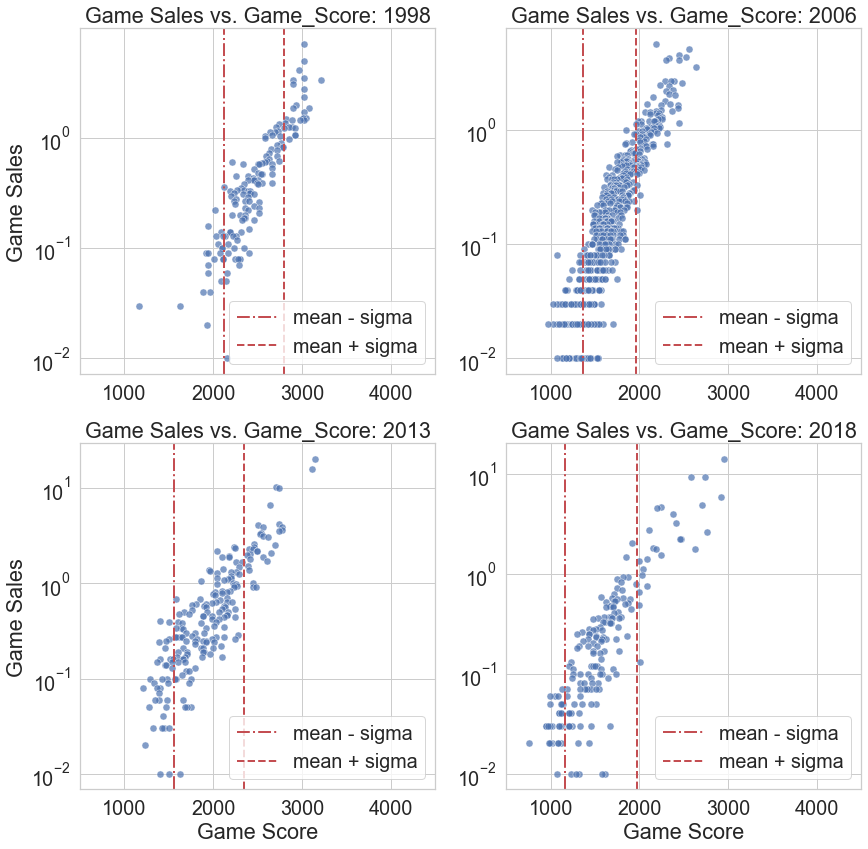

In [75]:
# Plot

x_min = 500
x_max = 4500
score_scatter_plot(yr, x_min, x_max)

The relationships stil holds true. And, although the class separation is cleaner, there is still significant ovrlap betwen sales for the different classes.

In order to improve this, we will doulbe the contribution of Sales_Score to the Game_Score feature and will repeat the same plots.

In [76]:
data_2['Game_Score'] = 2 * data_2['Sales_Score'] + data_2['Genre_Score'] + data_2['ESRB_Rating_Score'] + data_2['Platform_Score'] + data_2['Publisher_Score']

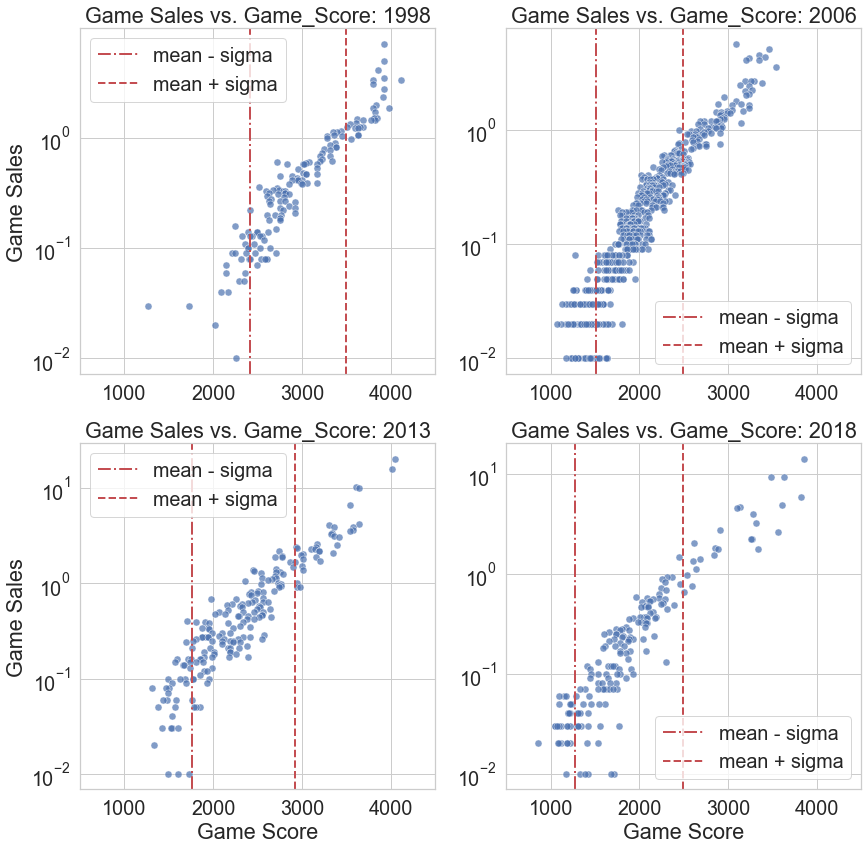

In [77]:
# Plot

x_min = 500
x_max = 4500
score_scatter_plot(yr, x_min, x_max)

Now the separation is much cleaner. There is still some overlap between the proposed Classes 2 and 3 (lower end of values). However, our focus is on accurately predicting Class 1 (top-ranked games) and this "blurring" between the two lower classes should not be a problem.

After this step, we are ready to beging modeling of our data.

### II. Modeling and Predictions

In [78]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 9803 non-null   object 
 1   Genre                9803 non-null   object 
 2   ESRB_Rating          9803 non-null   object 
 3   Platform             9803 non-null   object 
 4   Publisher            9803 non-null   object 
 5   Year                 9803 non-null   int32  
 6   Global_Sales         9803 non-null   float64
 7   Years_Since_Release  9803 non-null   int32  
 8   Avg_Sales            9803 non-null   float64
 9   Norm_Sales           9803 non-null   float64
 10  Sales_Score          9803 non-null   int64  
 11  Genre_Score          9803 non-null   int64  
 12  ESRB_Rating_Score    9803 non-null   int64  
 13  Platform_Score       9803 non-null   int64  
 14  Publisher_Score      9803 non-null   int64  
 15  Game_Score           9803 non-null   i

In [79]:
data_2.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Years_Since_Release,Avg_Sales,Norm_Sales,Sales_Score,Genre_Score,ESRB_Rating_Score,Platform_Score,Publisher_Score,Game_Score
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,6,1.068806,19.011870,900,397,477,469,900,4043
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,5,0.830775,23.339663,900,362,414,418,900,3894
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,17,0.474393,34.043514,900,366,424,438,475,3503
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,6,1.068806,14.838989,900,397,477,437,900,4011
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,4,0.850636,17.739660,900,506,445,458,353,3562
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,8,0.567014,26.136917,900,383,411,337,294,3225
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,9,0.535000,27.551402,900,372,423,400,320,3315
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,1,0.651657,21.391607,900,410,380,361,900,3851
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,7,0.777174,17.833846,900,470,434,426,424,3554
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,7,0.777174,17.756643,900,470,434,457,424,3585


In [80]:
data_2.columns

Index(['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year',
       'Global_Sales', 'Years_Since_Release', 'Avg_Sales', 'Norm_Sales',
       'Sales_Score', 'Genre_Score', 'ESRB_Rating_Score', 'Platform_Score',
       'Publisher_Score', 'Game_Score'],
      dtype='object')

#### For modeling we will use:
- Independent variables:
    - 'Genre', 
    - 'ESRB_Rating'
    - 'Platform'
    - 'Publisher
    - 'Years_Since_Release'
    - 'Year' - we will keep it to use later for data separation in training and test subsets
- Dependent variable:
    - 'Game_Score' which will be used to derive the target variable 'Game_Class' for our classifier

In [81]:
# select modeling data
data_m = data_2[['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Years_Since_Release', 'Year', 'Game_Score']]

data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Genre                9803 non-null   object
 1   ESRB_Rating          9803 non-null   object
 2   Platform             9803 non-null   object
 3   Publisher            9803 non-null   object
 4   Years_Since_Release  9803 non-null   int32 
 5   Year                 9803 non-null   int32 
 6   Game_Score           9803 non-null   int64 
dtypes: int32(2), int64(1), object(4)
memory usage: 459.6+ KB


In [82]:
data_m.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Years_Since_Release,Year,Game_Score
0,Action,M,PS,Rockstar Games,6,2013,4043
1,Action,M,PS,Rockstar Games,5,2014,3894
2,Action,M,PS,Rockstar Games,17,2002,3503
3,Action,M,XB,Rockstar Games,6,2013,4011
4,Shooter,M,PS,Activision,4,2015,3562
5,Shooter,M,XB,Activision,8,2011,3225
6,Shooter,M,XB,Activision,9,2010,3315
7,Action-Adventure,M,PS,Rockstar Games,1,2018,3851
8,Shooter,M,XB,Activision,7,2012,3554
9,Shooter,M,PS,Activision,7,2012,3585


Replace the current categorical values with numerical categorical values

- Genre

In [83]:
print(data_m['Genre'].value_counts().index)

Index(['Action', 'Sports', 'Shooter', 'Racing', 'Misc', 'Role-Playing',
       'Adventure', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle',
       'Action-Adventure'],
      dtype='object')


In [84]:
# Replace the current categorical values with numerical categorical values
genre_dict = {'Action':1, 'Sports':2, 'Shooter':3, 'Racing':4, 'Misc':5, 'Role-Playing':6, 'Adventure':7, 
              'Platform':8, 'Simulation':9, 'Fighting':10, 'Strategy':11, 'Puzzle':12, 'Action-Adventure':13}

data_m['Genre'].replace(genre_dict, inplace=True)

print(data_m['Genre'].value_counts().index)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


- ESRB_Rating

In [85]:
print(data_m['ESRB_Rating'].value_counts().index)

Index(['E', 'T', 'M', 'E10'], dtype='object')


In [86]:
# Replace the current categorical values with numerical categorical values
esrb_dict = {'E':1, 'T':2, 'M':3, 'E10':4}

data_m['ESRB_Rating'].replace(esrb_dict, inplace=True)

print(data_m['ESRB_Rating'].value_counts().index)

Int64Index([1, 2, 3, 4], dtype='int64')


- Platform

In [87]:
print(data_m['Platform'].value_counts().index)

Index(['PS', 'XB', 'DS', 'Wii', 'PSP', 'PC', 'GBA', 'GC', '3DS', 'N64', 'PSV',
       'NS'],
      dtype='object')


In [88]:
# Replace the current categorical values with numerical categorical values
platform_dict = {'PS':1, 'XB':2, 'DS':3, 'Wii':4, 'PC':5, 'PSP':6, 
                 'GBA':7, 'GC':8, '3DS':9, 'N64':10, 'PSV':11, 'NS':12}

data_m['Platform'].replace(platform_dict, inplace=True)

print(data_m['Platform'].value_counts().index)

Int64Index([1, 2, 3, 4, 6, 5, 7, 8, 9, 10, 11, 12], dtype='int64')


- Publisher

In [89]:
print(data_m['Publisher'].value_counts().index)

Index(['Activision', 'Ubisoft', 'Electronic Arts', 'THQ', 'EA Sports',
       'Konami', 'Sony Computer Entertainment', 'Sega', 'Capcom', 'Atari',
       'Midway Games', 'Nintendo', 'Majesco', 'Atlus', 'Acclaim Entertainment',
       '2K Sports', 'Disney Interactive Studios', 'Eidos Interactive', 'Namco',
       'Namco Bandai', 'Square Enix', 'Crave Entertainment',
       'Warner Bros. Interactive Entertainment', 'Codemasters', 'LucasArts',
       'Warner Bros. Interactive', 'NIS America', 'D3 Publisher', '505 Games',
       'Tecmo Koei', '2K Games', 'Rockstar Games', 'Namco Bandai Games',
       'Bethesda Softworks', 'Microsoft Game Studios', 'Aksys Games', 'KOEI',
       'Deep Silver', 'Destineer', 'Natsume', 'VU Games', 'Xseed Games',
       'Konami Digital Entertainment', 'Sierra Entertainment',
       'SouthPeak Interactive', 'Unknown', 'Bandai', 'Focus Home Interactive',
       'Idea Factory', '5pb'],
      dtype='object')


In [90]:
# Remove 'Unknown' from Publisher
data_m = data_m[data_m['Publisher'] != 'Unknown']
data_m.reset_index(inplace = True, drop = True)

# check
print(data_m['Publisher'].value_counts().index)

Index(['Activision', 'Ubisoft', 'Electronic Arts', 'THQ', 'EA Sports',
       'Konami', 'Sony Computer Entertainment', 'Sega', 'Capcom', 'Atari',
       'Midway Games', 'Nintendo', 'Majesco', 'Atlus', 'Acclaim Entertainment',
       '2K Sports', 'Disney Interactive Studios', 'Eidos Interactive', 'Namco',
       'Namco Bandai', 'Square Enix', 'Crave Entertainment',
       'Warner Bros. Interactive Entertainment', 'Codemasters', 'LucasArts',
       'Warner Bros. Interactive', 'NIS America', 'D3 Publisher', '505 Games',
       'Tecmo Koei', '2K Games', 'Rockstar Games', 'Namco Bandai Games',
       'Bethesda Softworks', 'Microsoft Game Studios', 'Aksys Games', 'KOEI',
       'Destineer', 'Deep Silver', 'Natsume', 'VU Games', 'Xseed Games',
       'Konami Digital Entertainment', 'Sierra Entertainment',
       'SouthPeak Interactive', 'Bandai', 'Focus Home Interactive',
       'Idea Factory', '5pb'],
      dtype='object')


In [91]:
# Replace the current categorical values with numerical categorical values
publ_dict = {'Activision':1, 'Ubisoft':2, 'Electronic Arts':3, 'THQ':4, 'EA Sports':5, 'Konami':6, 
             'Sony Computer Entertainment':7, 'Sega':8, 'Capcom':9, 'Atari':10, 'Midway Games':11, 
             'Nintendo':12, 'Majesco':13, 'Atlus':14, 'Acclaim Entertainment':15, '2K Sports':16, 
             'Disney Interactive Studios':17, 'Eidos Interactive':18, 'Namco':19, 'Namco Bandai':20,
             'Namco Bandai Games':20, 'Square Enix':21, 'Crave Entertainment':22, 
             'Warner Bros. Interactive Entertainment':23, 'Warner Bros. Interactive':23, 
             'Codemasters':24, 'LucasArts':25, 'NIS America':26, 'D3 Publisher':27, '505 Games':28, 
             'Tecmo Koei':29, '2K Games':30, 'Rockstar Games':31, 'Bethesda Softworks':32, 
             'Microsoft Game Studios':33, 'Aksys Games':34, 'KOEI':35, 'Deep Silver':36, 'Destineer':37, 
             'Natsume':38, 'Xseed Games':39, 'VU Games':40, 'Konami Digital Entertainment':41, 
             'Sierra Entertainment':42, 'SouthPeak Interactive':43, 'Bandai':44, 'Focus Home Interactive':45, 
             'Idea Factory':46, '5pb':47}

data_m['Publisher'].replace(publ_dict, inplace=True)

print(data_m['Publisher'].value_counts().index)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 23, 11, 20, 12, 13, 14, 15,
            16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
           dtype='int64')


- Add Game_Class which will be derived from the Game_Score values

In [92]:
# Add Game_Class feature
data_m['Game_Class'] = 0

data_m.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Years_Since_Release,Year,Game_Score,Game_Class
0,1,3,1,31,6,2013,4043,0
1,1,3,1,31,5,2014,3894,0
2,1,3,1,31,17,2002,3503,0
3,1,3,2,31,6,2013,4011,0
4,3,3,1,1,4,2015,3562,0
5,3,3,2,1,8,2011,3225,0
6,3,3,2,1,9,2010,3315,0
7,13,3,1,31,1,2018,3851,0
8,3,3,2,1,7,2012,3554,0
9,3,3,1,1,7,2012,3585,0


Separate games into three classes:
- **Class 1 - high rank**: game_score >= mean + sigma
- **Class 2 - middle rank**: mean + sigma > game_score >= mean - sigma
- **Class 3 - low rank**: mean - sigma > game_score

In [93]:
# Separate games in 3 classes

year_values = data_m['Year'].value_counts().index

# define coefficients to change the Game_Score bins when determining game classes
c_1 = 1
c_2 = 1


for y in year_values:
    score = data_m[data_2['Year'] == y]['Game_Score']
    
    m_score = score.values.mean()
    s_score = score.values.std()
    
    for i in score.index:
        x = data_m['Game_Score'].iloc[i]
        
        if x >= m_score + c_1 * s_score: # keep it 1*sigma intervals
            data_m['Game_Class'].iloc[i] = 1
        elif x >= m_score - c_2 * s_score  and x < m_score + c_1 * s_score:
            data_m['Game_Class'].iloc[i] = 2
        else:
            data_m['Game_Class'].iloc[i] = 3

In [94]:
data_m.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Years_Since_Release,Year,Game_Score,Game_Class
0,1,3,1,31,6,2013,4043,1
1,1,3,1,31,5,2014,3894,1
2,1,3,1,31,17,2002,3503,1
3,1,3,2,31,6,2013,4011,1
4,3,3,1,1,4,2015,3562,1
5,3,3,2,1,8,2011,3225,1
6,3,3,2,1,9,2010,3315,1
7,13,3,1,31,1,2018,3851,1
8,3,3,2,1,7,2012,3554,1
9,3,3,1,1,7,2012,3585,1


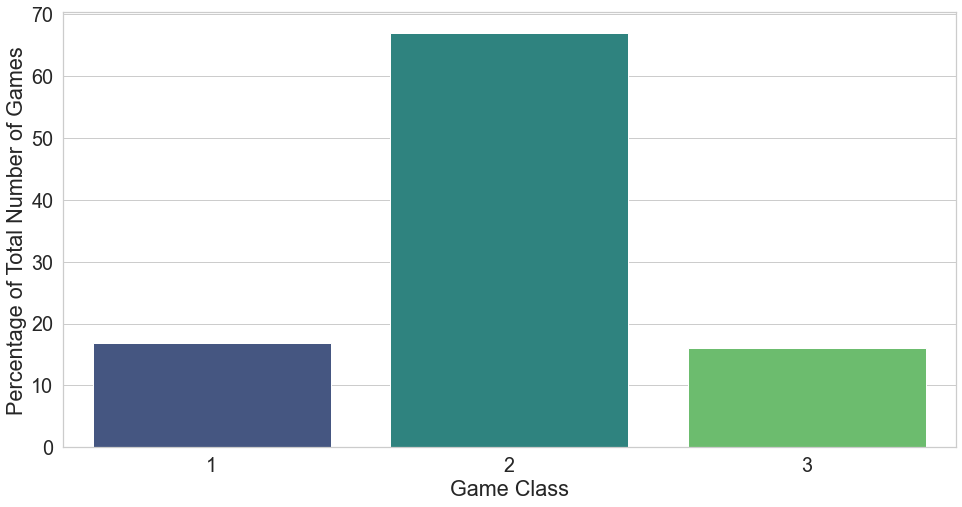

In [95]:
# Plot Game_Class count in percentages

game_class_count = data_m['Game_Class'].value_counts(normalize = True) * 100


plt.figure(figsize = (16, 8))
sns.barplot(x = game_class_count.index, y = game_class_count.values, palette = 'viridis')
plt.xlabel('Game Class')
plt.ylabel('Percentage of Total Number of Games')

plt.show()

Because of the nature of the Game_Score distribution and the chosen separation the number of games in Class 2 is close to 70% of all games. However, Class 1 and Class 3, are still well represented. 

For modeling we will use RandomForrestClassifier and XGBClassifier and will select the one which shows better performance without any optimization.

In [96]:
# Create subsets of independent and dependent (target) variables

# independent variables
X = data_m.iloc[:, 0:5].values # includes Genre, ESRB_Rating, Platform, Publisher, and Years_Since_Release

# target
y = data_m.iloc[:, -1].values # Game_Class

In [97]:
# Split into train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

- **RandomForestClassifier without optimization**

In [98]:
from sklearn.ensemble import RandomForestClassifier

# start with reasonable model parameters; oob_score, n_jobs are stabilizing and speeding up parameters
model_1 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 1, oob_score = True, n_jobs = -1, random_state = 42)

In [99]:
# train and predict

model_1 = model_1.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)

In [100]:
# evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_1))

Confusion Matrix:
[[ 155  193    4]
 [ 112 1081   90]
 [   0  178  137]]


Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.44      0.50       352
           2       0.74      0.84      0.79      1283
           3       0.59      0.43      0.50       315

    accuracy                           0.70      1950
   macro avg       0.64      0.57      0.60      1950
weighted avg       0.69      0.70      0.69      1950



The initial results from the RandomForestClassifier are promising, but not very good.

**Note**: Our focus in this problem is Class 1 precision - we do not want to classify lower ranked games, Class 3 in particular, as Class 1 games! Here it is 58% which means that 42% of the time a lower ranked game is being classified as Class 1 game making our predictions unreliable.

- **XGBClassifier without optimization**

In [101]:
# XGBClassifier
from xgboost import XGBClassifier
model_2 = XGBClassifier(objective = 'multi:softprob') # objective = 'multi:softprob' is used for multiclass classification

In [102]:
model_2 = model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

In [103]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 101  250    1]
 [  44 1215   24]
 [   0  245   70]]


Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.29      0.41       352
           2       0.71      0.95      0.81      1283
           3       0.74      0.22      0.34       315

    accuracy                           0.71      1950
   macro avg       0.71      0.49      0.52      1950
weighted avg       0.71      0.71      0.66      1950



The perfromance of the XGBClassifier model is significantly better. Here, the precision for Class 1 is 70% which provides 12% improvement over the RandomForestClassifier model predictions. Thus, we will continue with optimization of the XGBClassifier model. 

- **Bayesian optimization of XGBClassifier model**

In [104]:
# import XGB optimization packages

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

In [105]:
#  For the optimization split the original training set into new train/test sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

In [106]:
# Optimization 1 - metrics.precision_score

# create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 100, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 50, 0.5, dtype = float)),
         
        'objective':'multi:softprob'} # multiclass use 'objective':'multi:softprob', binary use 'objective':'binary:logistic'


def score(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
              verbose = False, early_stopping_rounds = 25) # 25 gives better results than 50 and 20!!!
    
    y_pred = model.predict(X_test1)

    # metrics.precision_score
    score = -metrics.precision_score(y_test1, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 500)
    return best

trials = Trials()
best_params = optimize(trials, space)

-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.691025641025641                                                                                                     
-0.6775641025641026                                                                                                    
-0.6846153846153846                                                                                                    
-0.6846153846153846                     

-0.7019230769230769                                                                                                    
-0.683974358974359                                                                                                     
-0.7                                                                                                                   
-0.683974358974359                                                                                                     
-0.6897435897435897                                                                                                    
-0.716025641025641                                                                                                     
-0.7128205128205128                                                                                                    
-0.6775641025641026                                                                                                    
-0.6858974358974359                     

-0.7192307692307692                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6871794871794872                                                                                                    
-0.683974358974359                                                                                                     
-0.6846153846153846                                                                                                    
-0.683974358974359                                                                                                     
-0.7185897435897436                                                                                                    
-0.6871794871794872                     

-0.6775641025641026                                                                                                    
-0.683974358974359                                                                                                     
-0.6846153846153846                                                                                                    
-0.6858974358974359                                                                                                    
-0.6858974358974359                                                                                                    
-0.683974358974359                                                                                                     
-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.683974358974359                      

-0.683974358974359                                                                                                     
-0.6846153846153846                                                                                                    
-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.683974358974359                                                                                                     
-0.6858974358974359                                                                                                    
-0.6846153846153846                                                                                                    
-0.6846153846153846                                                                                                    
-0.6858974358974359                     

-0.6775641025641026                                                                                                    
-0.683974358974359                                                                                                     
-0.7493589743589744                                                                                                    
-0.683974358974359                                                                                                     
-0.6846153846153846                                                                                                    
-0.6858974358974359                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.7275641025641025                     

-0.6858974358974359                                                                                                    
-0.683974358974359                                                                                                     
-0.7262820512820513                                                                                                    
-0.683974358974359                                                                                                     
-0.6967948717948718                                                                                                    
-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.683974358974359                                                                                                     
-0.683974358974359                      

-0.698076923076923                                                                                                     
-0.7391025641025641                                                                                                    
-0.683974358974359                                                                                                     
-0.6871794871794872                                                                                                    
-0.6846153846153846                                                                                                    
-0.683974358974359                                                                                                     
-0.6858974358974359                                                                                                    
-0.6871794871794872                                                                                                    
-0.6871794871794872                     

In [107]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 280,
 'objective': 'multi:softprob',
 'reg_alpha': 1.5,
 'reg_lambda': 16.5,
 'subsample': 1.0}

In [108]:
# Create optimized model

model_opt1 = XGBClassifier(colsample_bytree = 1.0, 
                         gamma = 0.0,
                         learning_rate = 0.3,
                         max_depth = 6,
                         min_child_weight = 1,
                         n_estimators = 280, 
                         reg_alpha = 1.5, 
                         reg_lambda = 16.5, 
                         subsample = 1.0,  
                         objective = 'multi:softprob')

In [109]:
# train and predict
model_opt1 = model_opt1.fit(X_train, y_train)

y_pred_opt1 = model_opt1.predict(X_test)

In [110]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[ 168  180    4]
 [  90 1132   61]
 [   0  164  151]]


Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.48      0.55       352
           2       0.77      0.88      0.82      1283
           3       0.70      0.48      0.57       315

    accuracy                           0.74      1950
   macro avg       0.71      0.61      0.65      1950
weighted avg       0.74      0.74      0.73      1950



In [111]:
# compare - model w/o optimization

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 101  250    1]
 [  44 1215   24]
 [   0  245   70]]


Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.29      0.41       352
           2       0.71      0.95      0.81      1283
           3       0.74      0.22      0.34       315

    accuracy                           0.71      1950
   macro avg       0.71      0.49      0.52      1950
weighted avg       0.71      0.71      0.66      1950



The optimization provides overall better results, but the precision for Class 1 has dropped by 5%. Run a second optimization with different metrics.

In [112]:
# Optimization 2 - metrics.f1_score

# create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 100, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 50, 0.5, dtype = float)),
         
        'objective':'multi:softprob'} # multiclass use 'objective':'multi:softprob', binary use 'objective':'binary:logistic'


def score(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
              verbose = False, early_stopping_rounds = 25) # 25 is better than 50 and 20!!!
    
    y_pred = model.predict(X_test1)

    # metrics.f1_score
    score = -metrics.f1_score(y_test1, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 500)
    return best

trials = Trials()
best_params = optimize(trials, space)

-0.6775641025641026                                                                                                    
-0.6891025641025641                                                                                                    
-0.683974358974359                                                                                                     
-0.6884615384615385                                                                                                    
-0.6846153846153846                                                                                                    
-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6846153846153846                     

-0.6858974358974359                                                                                                    
-0.6871794871794872                                                                                                    
-0.7185897435897436                                                                                                    
-0.6858974358974359                                                                                                    
-0.6775641025641026                                                                                                    
-0.683974358974359                                                                                                     
-0.7006410256410256                                                                                                    
-0.6846153846153846                                                                                                    
-0.6775641025641026                     

-0.6846153846153846                                                                                                    
-0.7                                                                                                                   
-0.6858974358974359                                                                                                    
-0.6775641025641026                                                                                                    
-0.6871794871794872                                                                                                    
-0.6846153846153846                                                                                                    
-0.683974358974359                                                                                                     
-0.6846153846153846                                                                                                    
-0.6846153846153846                     

-0.6878205128205128                                                                                                    
-0.683974358974359                                                                                                     
-0.6858974358974359                                                                                                    
-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.7256410256410257                                                                                                    
-0.6846153846153846                                                                                                    
-0.6846153846153846                                                                                                    
-0.6967948717948718                     

-0.6878205128205128                                                                                                    
-0.7320512820512819                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.6846153846153846                     

-0.683974358974359                                                                                                     
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.691025641025641                                                                                                     
-0.6775641025641026                                                                                                    
-0.691025641025641                      

-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6916666666666667                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.6878205128205128                                                                                                    
-0.691025641025641                      

-0.6775641025641026                                                                                                    
-0.7294871794871794                                                                                                    
-0.691025641025641                                                                                                     
-0.6775641025641026                                                                                                    
-0.6871794871794872                                                                                                    
-0.6775641025641026                                                                                                    
-0.6775641025641026                                                                                                    
-0.698076923076923                                                                                                     
-0.6775641025641026                     

In [113]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 0.6000000000000001,
 'gamma': 0.0,
 'learning_rate': 0.2,
 'max_depth': 9,
 'min_child_weight': 9,
 'n_estimators': 220,
 'objective': 'multi:softprob',
 'reg_alpha': 0.0,
 'reg_lambda': 31.5,
 'subsample': 0.6000000000000001}

In [114]:
# Create optimized model

model_opt2 = XGBClassifier(colsample_bytree = 0.6, 
                         gamma = 0.0,
                         learning_rate = 0.2,
                         max_depth = 9,
                         min_child_weight = 9,
                         n_estimators = 220, 
                         reg_alpha = 0.0, 
                         reg_lambda = 31.5, 
                         subsample = 0.6,  
                         objective = 'multi:softprob')

In [115]:
# train and predict
model_opt2 = model_opt2.fit(X_train, y_train)

y_pred_opt2 = model_opt2.predict(X_test)

In [116]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt2))

Confusion Matrix:
[[ 153  198    1]
 [  81 1143   59]
 [   0  175  140]]


Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.43      0.52       352
           2       0.75      0.89      0.82      1283
           3       0.70      0.44      0.54       315

    accuracy                           0.74      1950
   macro avg       0.70      0.59      0.63      1950
weighted avg       0.73      0.74      0.72      1950



In [117]:
# compare - Opt1 model

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[ 168  180    4]
 [  90 1132   61]
 [   0  164  151]]


Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.48      0.55       352
           2       0.77      0.88      0.82      1283
           3       0.70      0.48      0.57       315

    accuracy                           0.74      1950
   macro avg       0.71      0.61      0.65      1950
weighted avg       0.74      0.74      0.73      1950



In [118]:
# compare - model w/o optimization

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 101  250    1]
 [  44 1215   24]
 [   0  245   70]]


Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.29      0.41       352
           2       0.71      0.95      0.81      1283
           3       0.74      0.22      0.34       315

    accuracy                           0.71      1950
   macro avg       0.71      0.49      0.52      1950
weighted avg       0.71      0.71      0.66      1950



The XGBClassifier model with optimization 1 has the best overall results regarding Class 1. It shows 5% lower precision than the model without optimization. However, its recall has improved by close to 20% which means that the model is misclassifying less Class 1 games as games in another class. This is a good compromise and may be worth taking. Another important thing here is that none of the games in Class 3 were misclassified as Class 1 game for all three models. The misclassified Class 2 games as Class 1 most likely belong to the high end of the Class 2 range.

So, far we have used the entire data to make predictions. However, it is more important if one can predict what would make a high-selling game in the next 1-2 years based on data from several of the previous years. Referring to the plot of number of games released in a year, it appers that games released in 2013-2016 would be appropriate training data to predict the classes of games released in 2017 and 2018.

- **Predict classes of games released in 2017 and 2018 based on games released in 2013-2016**

In [119]:
# Select the corresponding train and test data

years_train = [2013, 2014, 2015, 2016]
years_test = [2017, 2018]

data_train = data_m[data_m['Year'].isin(years_train)]
data_test = data_m[data_m['Year'].isin(years_test)]

#train set
X_train = data_train.iloc[:, 0:4].values # 'Years_Since_Release' not included because of different values in both sets
y_train = data_train.iloc[:, -1].values

# test set is the same
X_test = data_test.iloc[:, 0:4].values # 'Years_Since_Release' not included because of different values in both sets
y_test = data_test.iloc[:, -1].values

- XGBClassifier without optimization

In [120]:
# model without optimization

model_2 = model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

In [121]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 22  28   0]
 [ 21 223   8]
 [  0  89  26]]


Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.44      0.47        50
           2       0.66      0.88      0.75       252
           3       0.76      0.23      0.35       115

    accuracy                           0.65       417
   macro avg       0.64      0.52      0.53       417
weighted avg       0.67      0.65      0.61       417



For rather small datasets and without clear connection between games released in different years these results are quite good. We would like to note also that a key feature, 'Years_Since_Release', is not used here, which could be a reason for the reduced performance numbers. 

- XGBClassifier with optimization

In [122]:
#  For optimization split the original training set into new train/test sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

In [123]:
# Optimization 1 - metrics.precision_score

# create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 100, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 50, 0.5, dtype = float)),
         
        'objective':'multi:softprob'} # multiclass use 'objective':'multi:softprob', binary use 'objective':'binary:logistic'


def score(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
              verbose = False, early_stopping_rounds = 25) # 25 gives better results than 50 and 20!!!
    
    y_pred = model.predict(X_test1)

    # metrics.precision_score
    score = -metrics.precision_score(y_test1, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 500)
    return best

trials = Trials()
best_params = optimize(trials, space)

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                                                                                                    
-0.7081081081081081                     

In [124]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 0.9,
 'gamma': 13.5,
 'learning_rate': 0.30000000000000004,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 170,
 'objective': 'multi:softprob',
 'reg_alpha': 0.0,
 'reg_lambda': 47.5,
 'subsample': 0.7000000000000001}

In [125]:
# Create optimized model

model_opt1 = XGBClassifier(colsample_bytree = 0.9, 
                         gamma = 13.5,
                         learning_rate = 0.3,
                         max_depth = 5,
                         min_child_weight = 5,
                         n_estimators = 170, 
                         reg_alpha = 0.0, 
                         reg_lambda = 47.5, 
                         subsample = 0.7,  
                         objective = 'multi:softprob')

In [126]:
# train and predict
model_opt1 = model_opt1.fit(X_train, y_train)

y_pred_opt1 = model_opt1.predict(X_test)

In [127]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[  0  50   0]
 [  0 252   0]
 [  0 115   0]]


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.60      1.00      0.75       252
           3       0.00      0.00      0.00       115

    accuracy                           0.60       417
   macro avg       0.20      0.33      0.25       417
weighted avg       0.37      0.60      0.46       417



The result above shows the pitfalls of optimization. It appears that the algorith achieves a minimum of the loss function when everything is categorized under one class only. In our case, since the classes are imbalanced, all games have been assigned to the largest class.

Try optimization with 'metrics.f1_score'.

In [128]:
# Optimization 2 - metrics.f1_score

# create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 100, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 50, 0.5, dtype = float)),
         
        'objective':'multi:softprob'} # multiclass use 'objective':'multi:softprob', binary use 'objective':'binary:logistic'


def score(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
              verbose = False, early_stopping_rounds = 25) # 25 is better than 50 and 20!!!
    
    y_pred = model.predict(X_test1)

    # metrics.f1_score
    score = -metrics.f1_score(y_test1, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 500)
    return best

trials = Trials()
best_params = optimize(trials, space)

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                                                                                                    
-0.7081081081081082                     

In [129]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 1.0,
 'gamma': 11.0,
 'learning_rate': 0.2,
 'max_depth': 9,
 'min_child_weight': 6,
 'n_estimators': 70,
 'objective': 'multi:softprob',
 'reg_alpha': 10.5,
 'reg_lambda': 12.5,
 'subsample': 0.5}

In [130]:
# Create optimized model

model_opt2 = XGBClassifier(colsample_bytree = 1.0, 
                         gamma = 11.0,
                         learning_rate = 0.2,
                         max_depth = 9,
                         min_child_weight = 6,
                         n_estimators = 70, 
                         reg_alpha = 10.5, 
                         reg_lambda = 12.5, 
                         subsample = 0.5,  
                         objective = 'multi:softprob')

In [131]:
# train and predict
model_opt2 = model_opt2.fit(X_train, y_train)

y_pred_opt2 = model_opt2.predict(X_test)

In [132]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt2))

Confusion Matrix:
[[  0  50   0]
 [  0 252   0]
 [  0 115   0]]


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.60      1.00      0.75       252
           3       0.00      0.00      0.00       115

    accuracy                           0.60       417
   macro avg       0.20      0.33      0.25       417
weighted avg       0.37      0.60      0.46       417



The outcome of the second optimization is the same as in optimization 1. So, we will use the predictions from the model without optimization to find out which games are ranked in Class 1.

- Analyzing the predictions

In [133]:
# Find the indices for Class 1 predictions in y_pred_2

ind_1 = [i for i, d in enumerate(y_pred_2) if d == 1]
print(ind_1)

[1, 2, 3, 4, 5, 7, 16, 17, 18, 21, 22, 26, 27, 33, 36, 40, 41, 42, 44, 47, 48, 52, 56, 57, 89, 90, 100, 107, 115, 128, 136, 150, 176, 178, 183, 185, 206, 236, 250, 273, 330, 361, 406]


In [134]:
# Find the features values of the games predicted to be in Class 1
(combo_feat, combo_freq) = np.unique(X_test[ind_1], axis = 0, return_counts = True)

In [135]:
print('Combinations of Feature Values:')
print(combo_feat)

Combinations of Feature Values:
[[ 1  3  1 32]
 [ 1  3  2 32]
 [ 2  1  1  3]
 [ 2  1  1  5]
 [ 2  1  1  6]
 [ 2  1  1 16]
 [ 2  1  2  3]
 [ 2  1  2  5]
 [ 2  1  2  6]
 [ 2  1  2 16]
 [ 3  3  1  1]
 [ 3  3  1  2]
 [ 3  3  1  3]
 [ 3  3  1 32]
 [ 3  3  2  1]
 [ 3  3  2  2]
 [ 3  3  2  3]
 [ 3  3  2 32]
 [ 6  3  1  2]
 [ 6  3  1  3]
 [ 6  3  1 32]
 [ 7  3  1 31]
 [ 7  3  2 31]
 [13  3  1  2]]


In [136]:
print('Most Often Occuring Combinations:')
print(combo_freq)

Most Often Occuring Combinations:
[2 2 1 4 1 1 1 4 1 1 3 1 1 4 3 1 1 2 2 1 2 1 1 2]


There are five most commonly occuring combinations for games predicted to be in Class 1:
- Combination 1: Genre = 2, ESRB_Rating = 1, Platform = 1, Publisher = 5 - occurs 4 times
- Combination 2: Genre = 2, ESRB_Rating = 1, Platform = 2, Publisher = 5 - occurs 4 times
- Combination 3: Genre = 3, ESRB_Rating = 3, Platform = 1, Publisher = 32 - occurs 4 times
- Combination 4: Genre = 3, ESRB_Rating = 3, Platform = 1, Publisher = 1 - occurs 3 times
- Combination 5: Genre = 3, ESRB_Rating = 3, Platform = 2, Publisher = 1 - occurs 3 times

Using our feature dictionaries we will find the above feature values.

- Best Combinations - Genre

In [137]:
# Find dict keys

genre_key = list(genre_dict.keys())
genre_val = list(genre_dict.values())

position_1 = genre_val.index(2)
position_2 = genre_val.index(3)

print(genre_key[position_1])
print(genre_key[position_2])

Sports
Shooter


The two genres in the predicted high ranking games are **Sports** (value = 2) and **Shooter** (value = 3).

- Best Combinations - ESRB_Rating

In [138]:
# Find dict keys

esrb_key = list(esrb_dict.keys())
esrb_val = list(esrb_dict.values())

position_1 = esrb_val.index(1)
position_2 = esrb_val.index(3)

print(esrb_key[position_1])
print(esrb_key[position_2])

E
M


The two ESRB_Rating vlaues in the predicted high ranking games are **Everyone (E)** (value = 1) and **Mature (M)** (value = 3).

- Best Combinations - Platform

In [139]:
# Find dict keys

platform_key = list(platform_dict.keys())
platform_val = list(platform_dict.values())

position_1 = platform_val.index(1)
position_2 = platform_val.index(2)

print(platform_key[position_1])
print(platform_key[position_2])

PS
XB


The two platforms in the predicted high ranking games are **PlayStation (PS)** (value = 1) and **XBox (XB)** (value = 2).

- Best Combinations - Publisher

In [140]:
# Find dict keys

publ_key = list(publ_dict.keys())
publ_val = list(publ_dict.values())

position_1 = publ_val.index(1)
position_2 = publ_val.index(5)
position_3 = publ_val.index(32)

print(publ_key[position_1])
print(publ_key[position_2])
print(publ_key[position_3])

Activision
EA Sports
Bethesda Softworks


The three publishers in the predicted high ranking games are **Activision** (value = 1) and **EA Sports** (value = 5), and **Bethesda Softworks** (value = 32).

Finally, the predicted high ranking games have the following features:
- 1) Genre = Sports, ESRB_Rating = Everyone, Platform = PlayStation, Publisher = EA Sports (occurs 4 times)
- 2) Genre = Sports, ESRB_Rating = Everyone, Platform = XBox, Publisher = EA Sports (occurs 4 times)
- 3) Genre = Shooter, ESRB_Rating = Mature, Platform = PlayStation, Publisher = Bethesda Softworks (occurs 4 times)
- 4) Genre = Shooter, ESRB_Rating = Mature, Platform = PlayStation, Publisher = Activision (occurs 3 times)
- 5) Genre = Shooter, ESRB_Rating = Mature, Platform = Xbox, Publisher = Activision (occurs 3 times)

#### Summary of results and recommendations

The results from the model predictions are supported by our EDA findings. Therefore, we are confident in our recommendations to the game developer startup. Please, note that items combinations with exactly the same features except their platforms are most likely the PS and XB versions of the same game. 

Our recommendation is:
- First choice: A Shooter game with Mature rating for the current generation of the PlayStation console and team up with either Activision or Bethesda Softworks as a publisher. This recommendation is based on our analysis and predictions. Additional reseach into these two companies, tilts the choice towards Activision - the company has many high selling games (by significant margin higher than Bethesda); its "Call of Duty" series is one of the most profitable and most popular shooter games for number of years.
- Second choice: A Sports game with Everyone rating for the current generation of the PlayStation console and team up with EA Sports.
- Possible alternative: The team could consider developing the same games for the current generation of the Xbox console depending on development time and costs for these two platforms, and team expertise.
- Choosing between a Shooter (1st choice) and a Sports (2nd choice) game will ultimately come down to the team's expertise in either of these genres, and time and cost of development.

**Note**: 

One could ask the question why the final prediction was not made for trully future games (for our dataset - games beyond 2018) based on data for the last four years.
There are two reasons:
- One is that our predictions for 2017 and 2018 are made without any knowledge of the games in these two years. We simply took all games that the model placed in Class 1 regardless of whether that matched the games true classes.
- The second reason is that if we use the last four years and select in random 80% of the games for training and 20% of the games for predicting, there is a signigicant probability that some of the best selling games might not be included in the test set and thus we won't be able to predict those as being successful. In our approach, by using all games in the last two years the likelihood that we will miss a game with successful combination of features is much smaller. 